# Credit Card Fraud (using ensemble learning: voating)

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from pylab import rcParams
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix 
from time import perf_counter
from time import process_time
# Import functions created for this course
import timeit

In [4]:
df = pd.read_csv("/kaggle/input/credit-card-6/creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
target = 'Class'

In [6]:
X = df.loc[:, df.columns!=target]
Y = df.loc[:, df.columns==target]

Class
0    284315
1       492
Name: count, dtype: int64


Class
0    227451
1       394
Name: count, dtype: int64

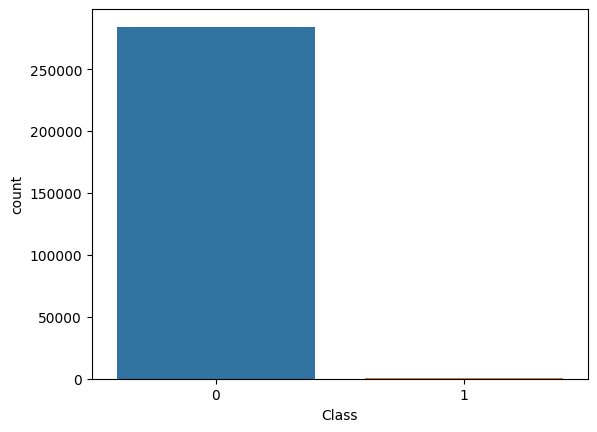

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.20,random_state=42)


ax = sns.countplot(x=target, data=df)
print(df[target].value_counts())
Y_train[target].value_counts()

# SMOTE

In [8]:
sm = SMOTE(random_state=12, sampling_strategy=1.0)
x_train_res, y_train_res = sm.fit_resample(X_train, Y_train)
unique, count = np.unique(y_train_res, return_counts=True)
y_train_smote_value_count = { k:v for (k,v) in zip(unique, count)}
y_train_smote_value_count
X_train=x_train_res
Y_train=y_train_res

In [9]:
def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))
    pass
    
def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y_test,  y_pred_proba)
    auc = roc_auc_score(Y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

In [10]:
X_train.shape

(454902, 30)

In [11]:
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,143352.000000,1.955041,-0.380783,-0.315013,0.330155,-0.509374,-0.086197,-0.627978,0.035994,1.054560,...,-0.125390,0.238197,0.968305,0.053208,-0.278602,-0.044999,-0.216780,0.045168,-0.047145,9.990000
1,117173.000000,-0.400975,-0.626943,1.555339,-2.017772,-0.107769,0.168310,0.017959,-0.401619,0.040378,...,-0.470372,-0.153485,0.421703,0.113442,-1.004095,-1.176695,0.361924,-0.370469,-0.144792,45.900000
2,149565.000000,0.072509,0.820566,-0.561351,-0.709897,1.080399,-0.359429,0.787858,0.117276,-0.131275,...,0.012227,-0.314638,-0.872959,0.083391,0.148178,-0.431459,0.119690,0.206395,0.070288,11.990000
3,93670.000000,-0.535045,1.014587,1.750679,2.769390,0.500089,1.002270,0.847902,-0.081323,0.371579,...,-0.253757,0.063525,0.443431,-0.072754,0.448192,-0.655203,-0.181038,-0.093013,-0.064931,117.440000
4,82655.000000,-4.026938,1.897371,-0.429786,-0.029571,-0.855751,-0.480406,-0.435632,1.313760,0.536044,...,-0.012320,-0.480691,-0.230369,0.250717,0.066399,0.470787,0.245335,0.286904,-0.322672,25.760000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454897,41139.288903,-4.672245,5.070271,-7.636822,7.528021,-6.949536,-1.773207,-8.276517,2.767726,-7.065673,...,1.637298,2.245313,0.548504,0.041102,0.591497,0.351393,0.374523,2.133736,0.944921,329.769372
454898,18275.265510,-12.885612,5.930993,-15.864035,10.443404,-3.708508,-3.050499,-14.849994,-1.297643,-6.031691,...,0.966632,-2.266429,0.225676,-3.192680,-0.717504,0.173497,0.665850,2.431572,-0.886009,1.284834
454899,155550.816770,0.508201,2.161775,-3.777326,3.705829,0.302453,-1.625310,-0.593478,0.212879,-2.211695,...,0.375037,0.282634,-0.090512,-0.063457,-0.261962,0.322438,0.342420,0.302770,0.161023,48.259955
454900,143442.242331,-2.458646,3.448899,-4.700197,5.859372,-0.845362,-1.331758,-3.767865,2.011206,-3.633724,...,0.280477,0.722354,-0.212428,-0.251274,-0.457646,0.328235,0.230334,0.503863,0.072291,1.000000


In [12]:
Y_train[target].value_counts()

Class
0    227451
1    227451
Name: count, dtype: int64

# DT

Elapsed time :  0.10443105200010905
Accuracy on Training data DT: ,  0.9998505172542658
Elapsed time :  0.008960998000020481
Accuracy score on Test data DT: 0.9984024437344194
Accuracy =  0.9984024437344194
Precision =  0.5228758169934641
Recall =  0.8163265306122449
F1 Score =  0.6374501992031874
[[56791    18]
 [   73    80]]


<Axes: >

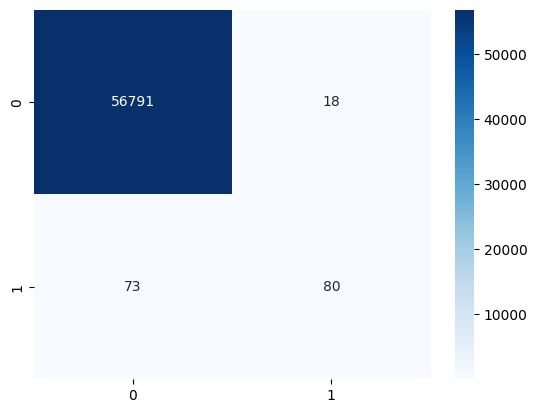

In [11]:
from sklearn import tree
classify_ = tree.DecisionTreeClassifier(criterion= 'entropy', max_depth= 37, min_samples_leaf= 2, min_samples_split= 3,max_features=15,max_leaf_nodes=1200,splitter='best')
classify_ = classify_.fit(X_train,Y_train)

#Accuracy on training data
start_time = timeit.default_timer()

x_train_prediction = classify_.predict(X_train)

end_time = timeit.default_timer()
elapsed_time = end_time - start_time
print("Elapsed time : ",elapsed_time)
training_data_accuracy = accuracy_score(x_train_prediction , Y_train)
print('Accuracy on Training data DT: , ', training_data_accuracy)

# accuracy on test data 
start_time = timeit.default_timer()

x_test_prediction = classify_.predict(X_test)

end_time = timeit.default_timer()
elapsed_time = end_time - start_time
print("Elapsed time : ",elapsed_time)

test_data_accuracy=accuracy_score(x_test_prediction,Y_test)
print('Accuracy score on Test data DT:' ,test_data_accuracy)

generate_model_report(Y_test, x_test_prediction)
cf_matrix=confusion_matrix(x_test_prediction,Y_test)
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt='g')

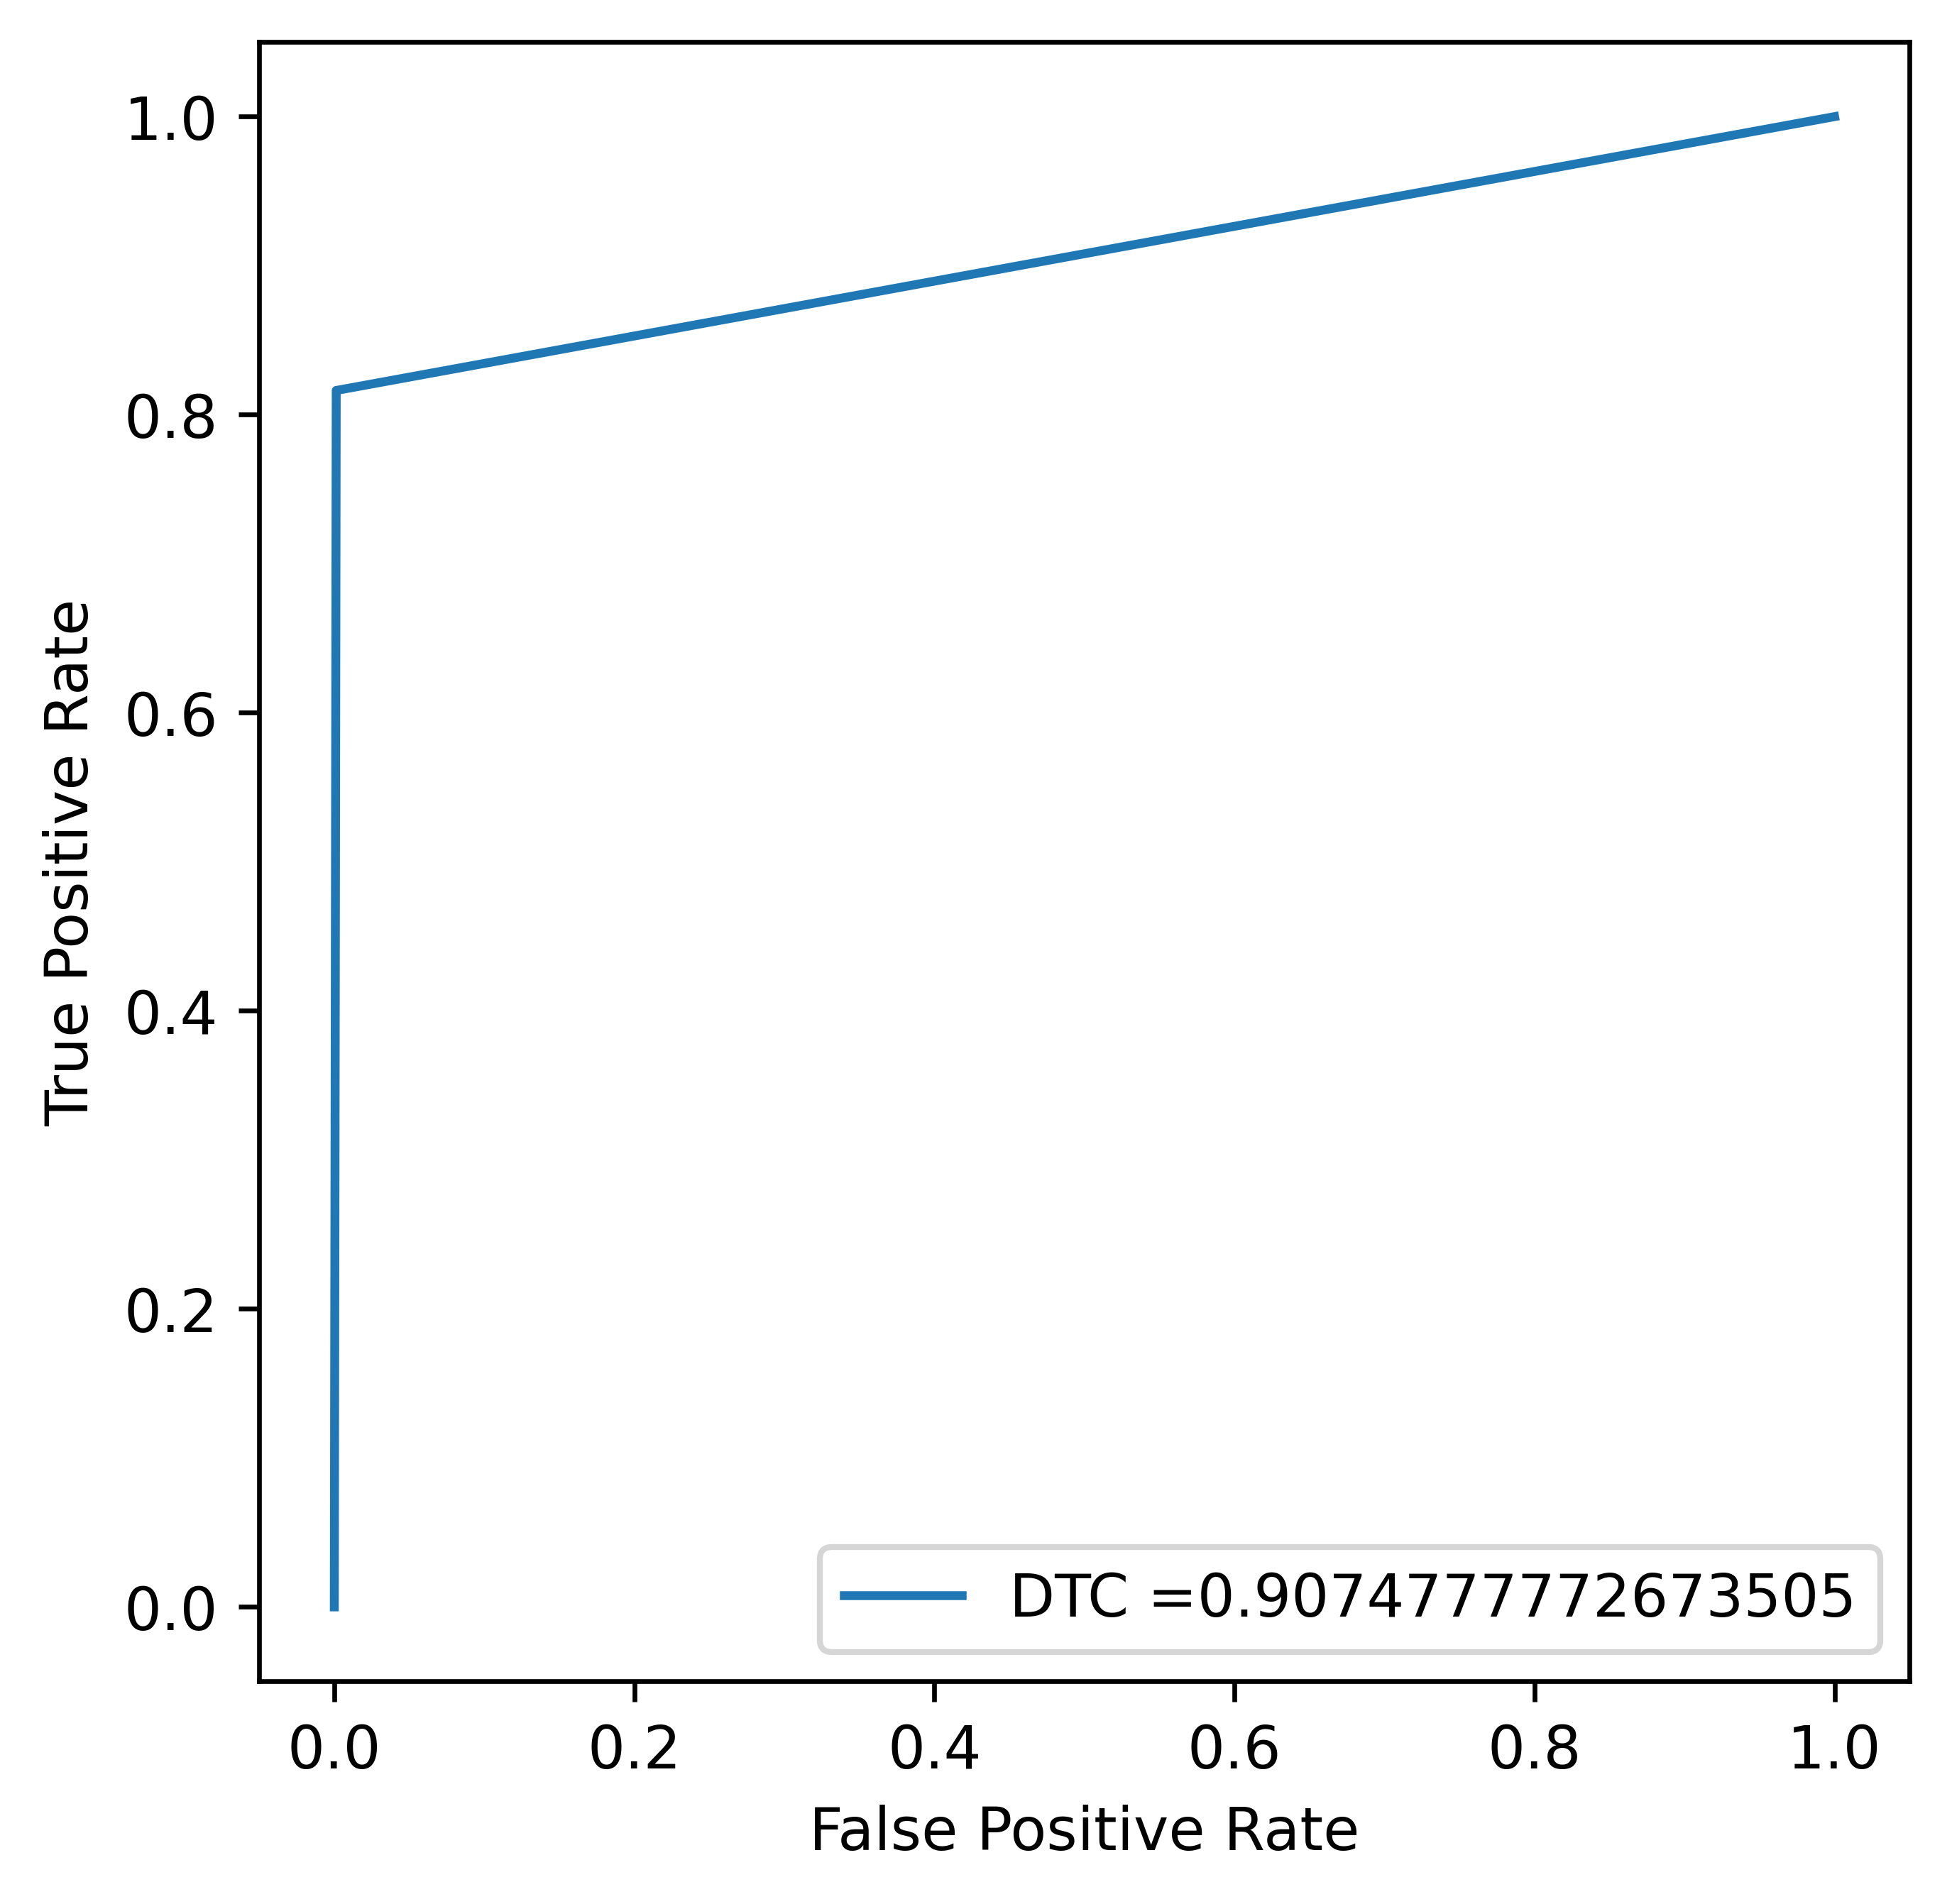

In [12]:
    y_pred_proba_dt = classify_.predict_proba(X_test)[:, 1]
    fpr_dt, tpr_dt, thresholds = roc_curve(Y_test,  y_pred_proba_dt)
    auc_dt = roc_auc_score(Y_test, y_pred_proba_dt)
    
    plt.figure(figsize=(5, 5), dpi=600)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    plt.plot(fpr_dt,tpr_dt,linestyle='solid',label="DTC ="+str(auc_dt))
    plt.legend(loc=4)
    plt.show()

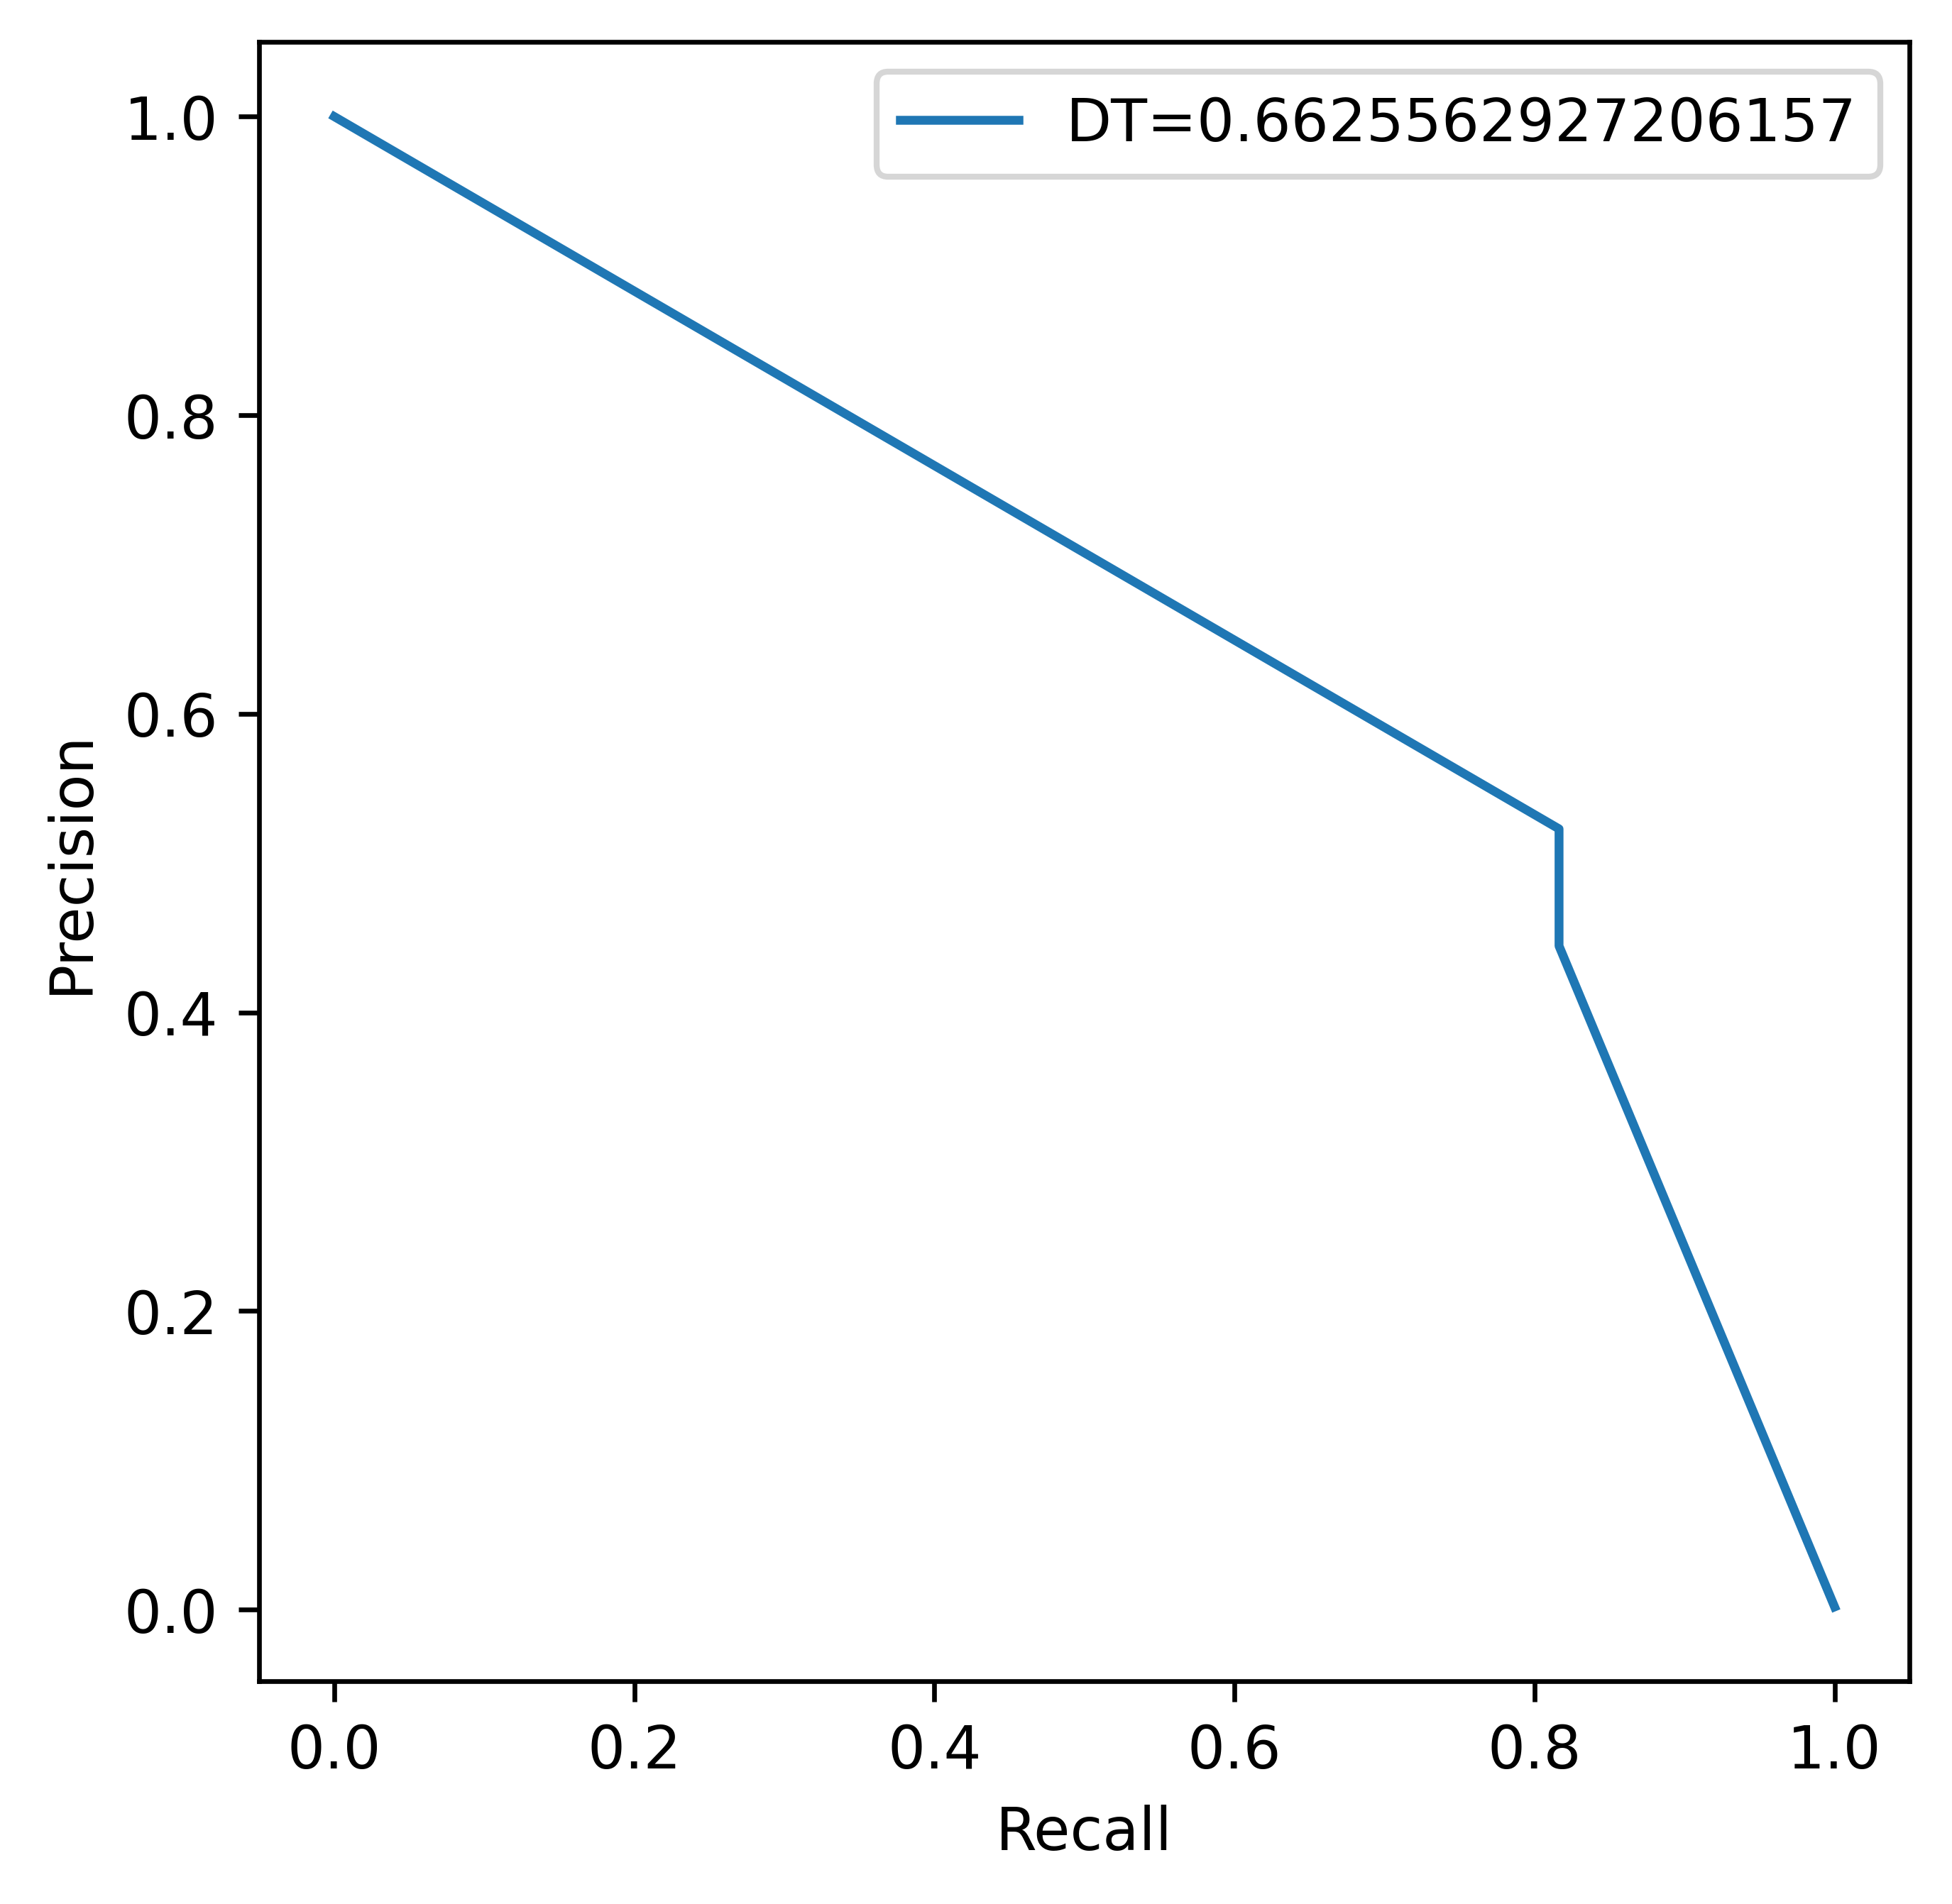

In [13]:
from sklearn.metrics import precision_recall_curve
from sklearn import metrics
#print('Logistic PR-AUC: %.3f'% auc_score)
y_test_prob_rf=classify_.predict_proba(X_test)[:,1]
precision_rf, recall_rf,_ =precision_recall_curve(Y_test, y_test_prob_rf)
auc_score_rf=metrics.auc(recall_rf, precision_rf)

plt.figure(figsize=(5, 5), dpi=600)
plt.plot(recall_rf, precision_rf, marker='',label="DT="+str(auc_score_rf))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

# XGBC

Elapsed time :  1.155334011999912
Accuracy on Training data : ,  0.9999978017243274
Elapsed time :  0.14102083399984622
Accuracy score on Test data XGBost: 0.9994382219725431
Accuracy =  0.9994382219725431
Precision =  0.8367346938775511
Recall =  0.8367346938775511
F1 Score =  0.8367346938775511
[[56848    16]
 [   16    82]]


<Axes: >

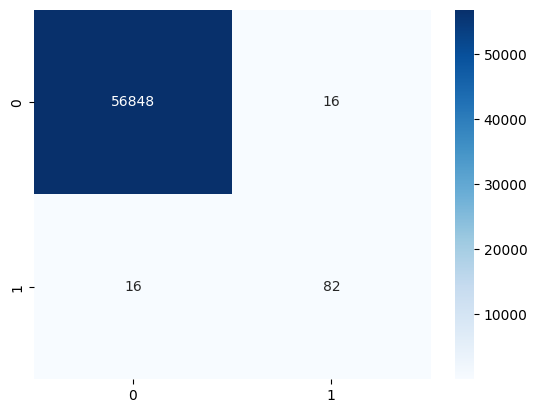

In [14]:
from xgboost import XGBClassifier
#n_estimators= 12, max_depth=7, learning_rate=0.2
model = XGBClassifier(colsample_bytree= 0.9747603118288211, gamma= 0.07353674046451897, learning_rate=0.28797628754844834, max_depth= 5, min_child_weight= 1, n_estimators=600, reg_alpha=0.6623597785186586, reg_lambda=4.586126640463295, subsample=0.8104028422110456)

model.fit(X_train, Y_train)

#Accuracy on training data
start_time = timeit.default_timer()
x_train_prediction = model.predict(X_train)
end_time = timeit.default_timer()
elapsed_time = end_time - start_time
print("Elapsed time : ",elapsed_time)

training_data_accuracy = accuracy_score(x_train_prediction , Y_train)
print('Accuracy on Training data : , ', training_data_accuracy)

# accuracy on test data 
start_time = timeit.default_timer()
x_test_prediction = model.predict(X_test)
end_time = timeit.default_timer()
elapsed_time = end_time - start_time
print("Elapsed time : ",elapsed_time)

test_data_accuracy=accuracy_score(x_test_prediction,Y_test)
print('Accuracy score on Test data XGBost:' ,test_data_accuracy)
generate_model_report(Y_test, x_test_prediction)

confusion_matrix(x_test_prediction,Y_test)
cf_matrix=confusion_matrix(x_test_prediction,Y_test)
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt='g')

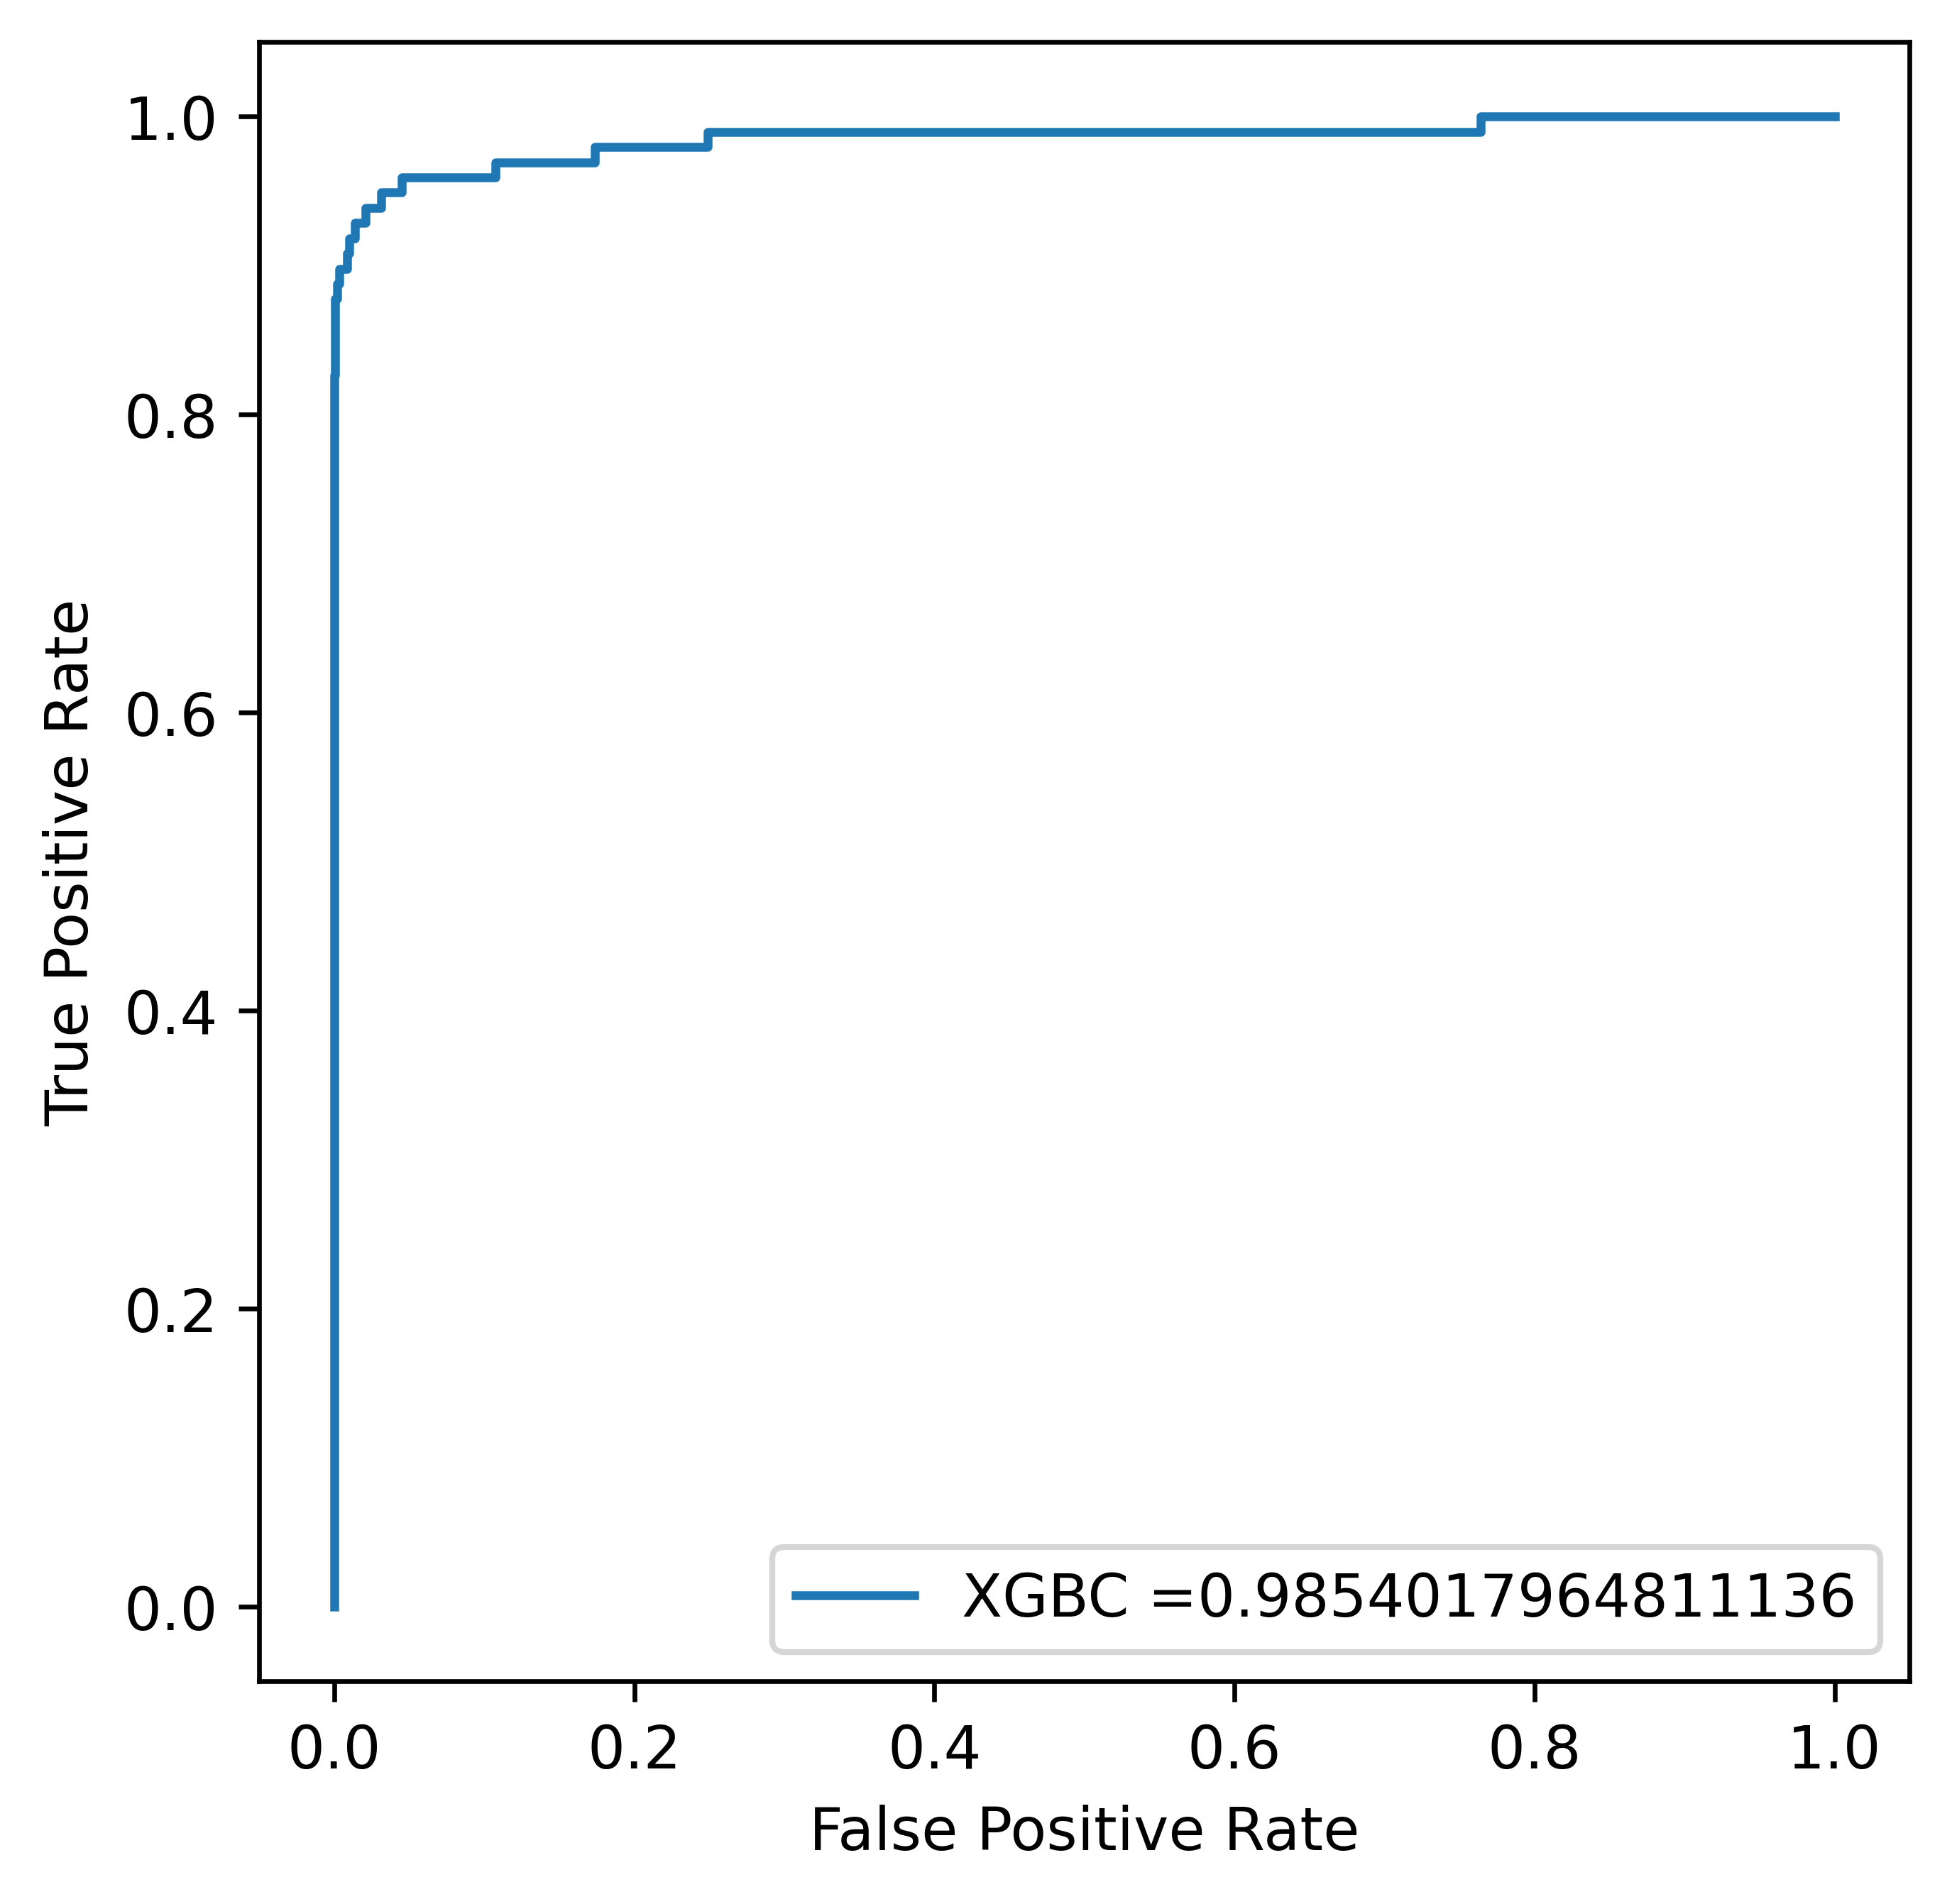

In [15]:
    y_pred_proba_dt = model.predict_proba(X_test)[:, 1]
    fpr_dt, tpr_dt, thresholds = roc_curve(Y_test,  y_pred_proba_dt)
    auc_dt = roc_auc_score(Y_test, y_pred_proba_dt)
    
    plt.figure(figsize=(5, 5), dpi=600)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    plt.plot(fpr_dt,tpr_dt,linestyle='solid',label="XGBC ="+str(auc_dt))
    plt.legend(loc=4)
    plt.show()

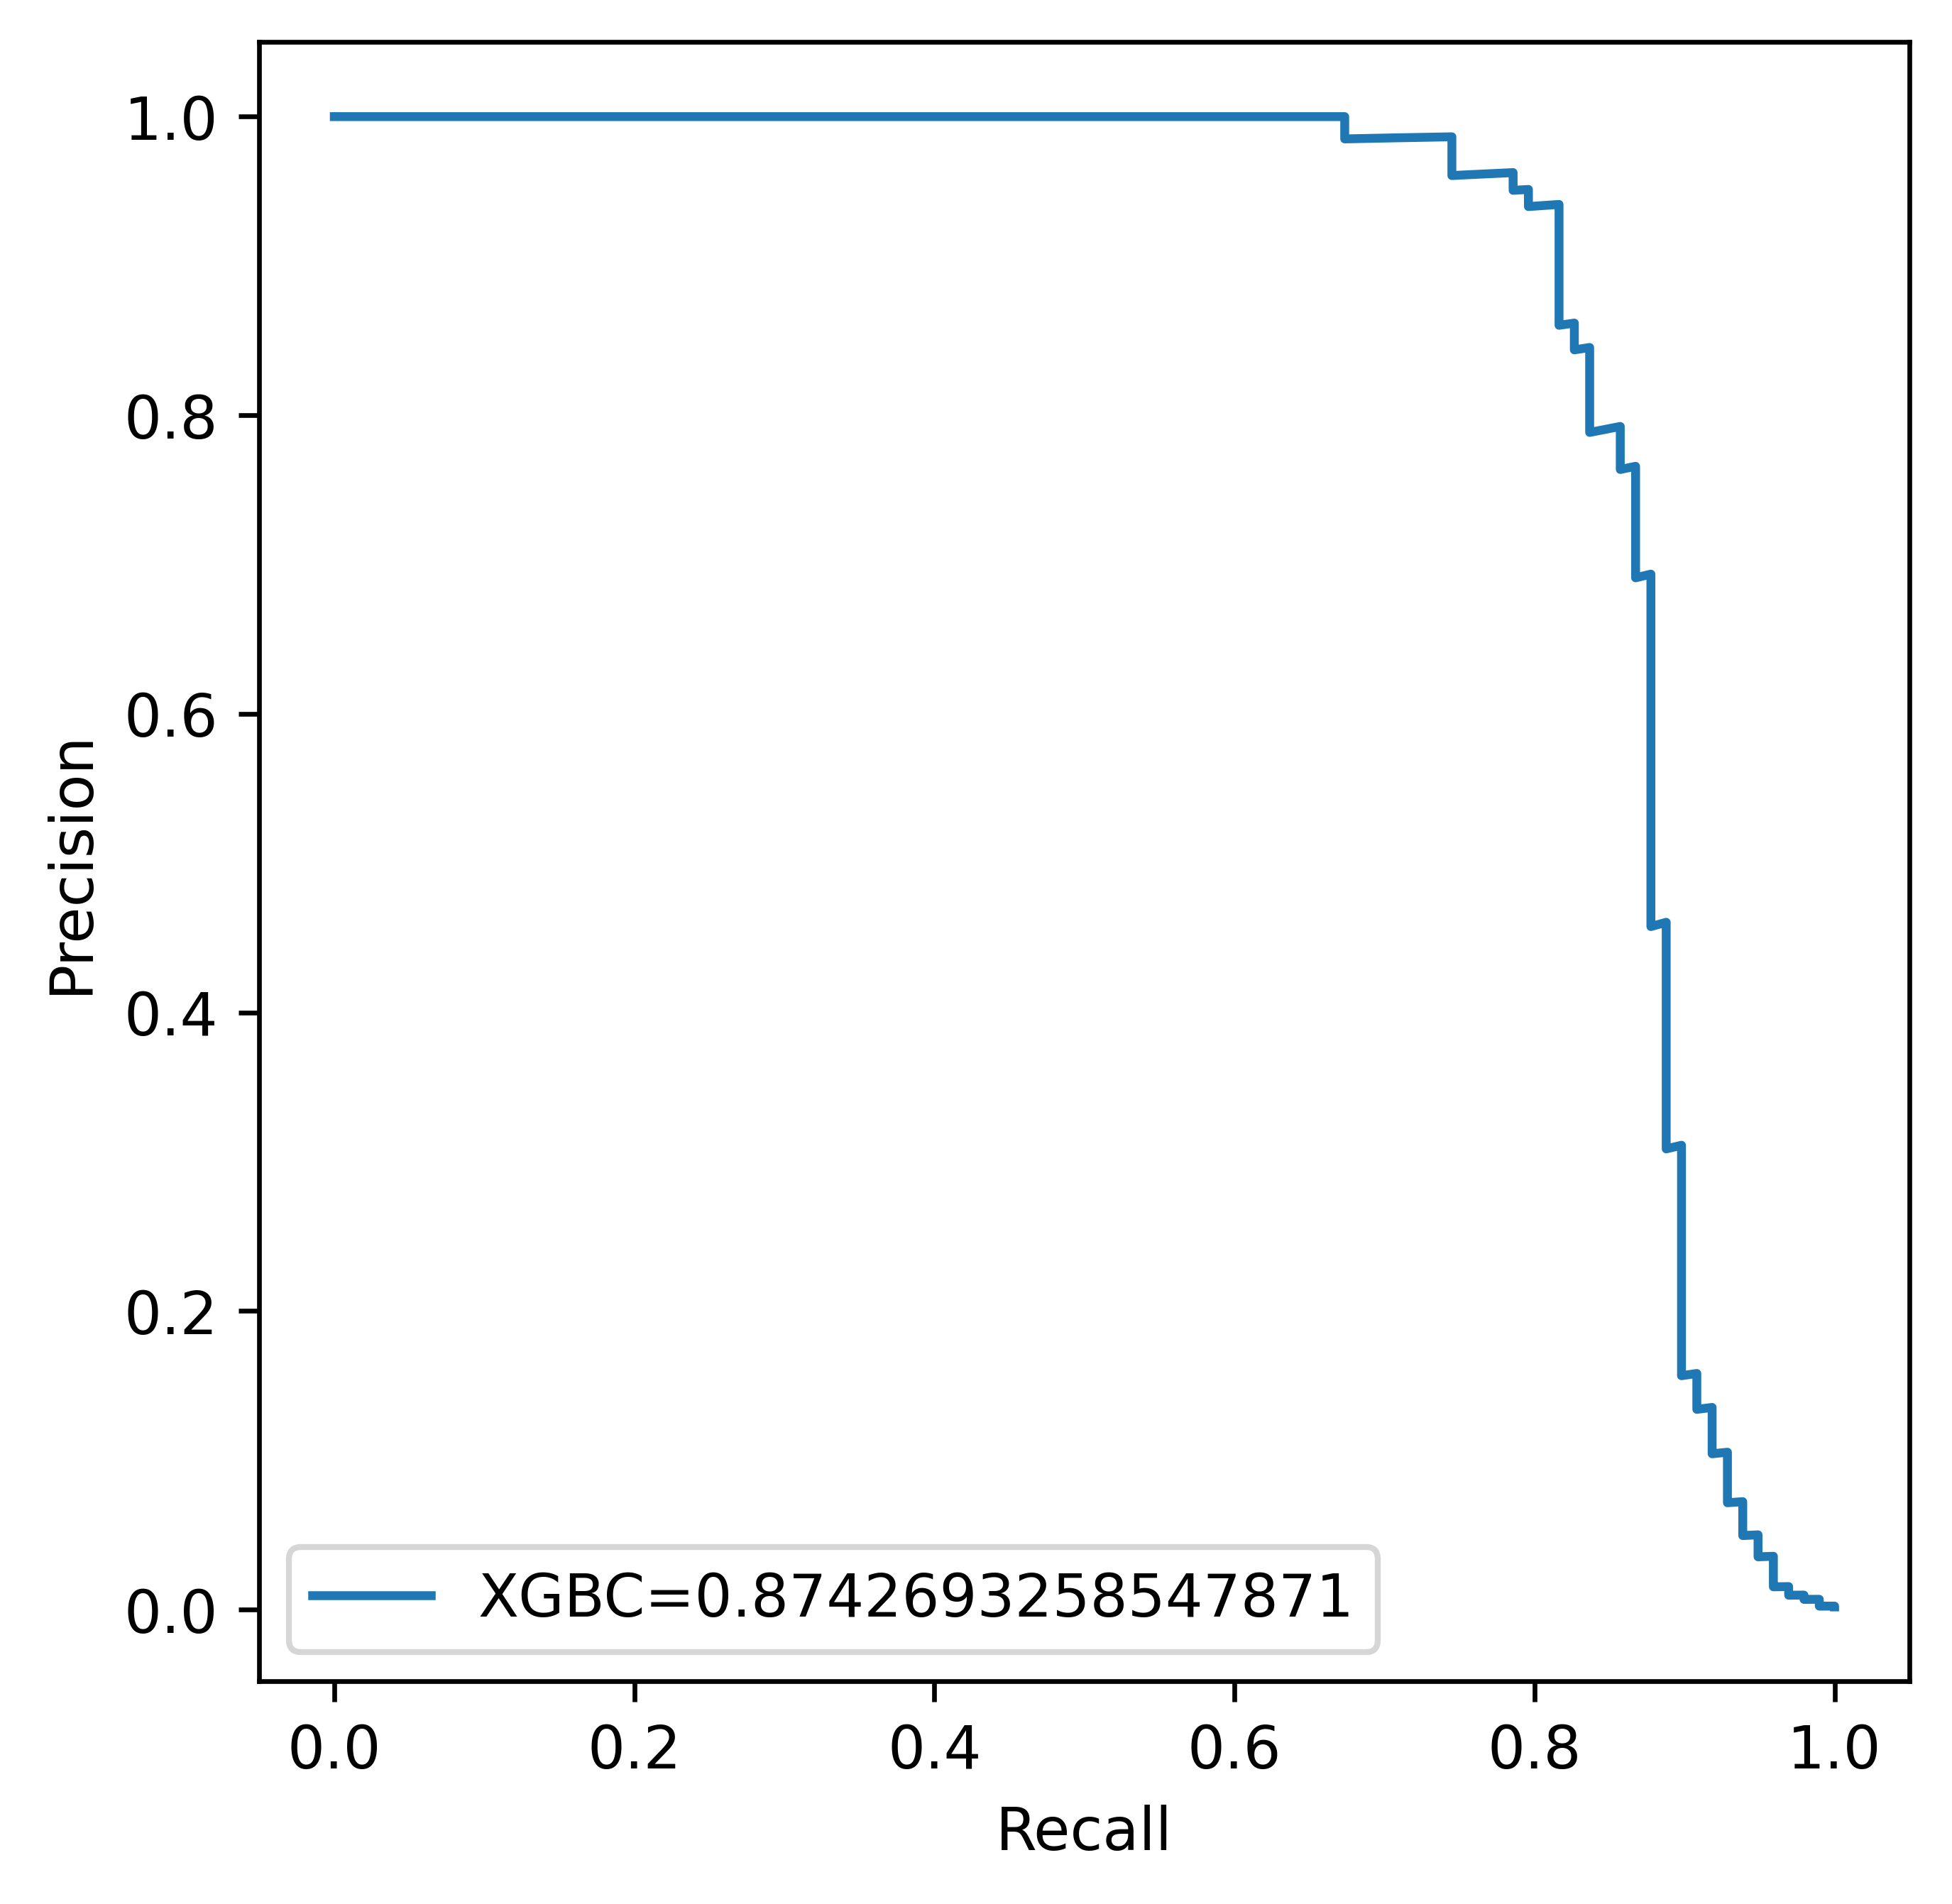

In [16]:
from sklearn.metrics import precision_recall_curve
from sklearn import metrics
#print('Logistic PR-AUC: %.3f'% auc_score)
y_test_prob_rf=model.predict_proba(X_test)[:,1]
precision_rf, recall_rf,_ =precision_recall_curve(Y_test, y_test_prob_rf)
auc_score_rf=metrics.auc(recall_rf, precision_rf)

plt.figure(figsize=(5, 5), dpi=600)
plt.plot(recall_rf, precision_rf, marker='',label="XGBC="+str(auc_score_rf))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

# RF

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=4,random_state=2010,criterion='entropy',n_estimators=150,verbose=False)

rf.fit(X_train, Y_train)

start_time = timeit.default_timer()
x_train_prediction = rf.predict(X_train)

end_time = timeit.default_timer()
elapsed_time = end_time - start_time

print("Elapsed time : ",elapsed_time)

training_data_accuracy = accuracy_score(x_train_prediction , Y_train)
print('Accuracy on Training data : , ', training_data_accuracy)

# accuracy on test data 

start_time = timeit.default_timer()
x_test_prediction = rf.predict(X_test)

end_time = timeit.default_timer()
elapsed_time = end_time - start_time

print("Elapsed time : ",elapsed_time)

test_data_accuracy=accuracy_score(x_test_prediction,Y_test)
print('Accuracy score on Test data RF :' ,test_data_accuracy)

generate_model_report(Y_test, x_test_prediction)
#print(confusion_matrix(x_test_prediction,Y_test))
confusion_matrix(x_test_prediction,Y_test)
cf_matrix=confusion_matrix(x_test_prediction,Y_test)
print(cf_matrix)

/tmp/ipykernel_36/3717988680.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, Y_train)


Elapsed time :  3.3095395870000175
Accuracy on Training data : ,  1.0
Elapsed time :  0.4419746500000201
Accuracy score on Test data RF : 0.9995084442259752
Accuracy =  0.9995084442259752
Precision =  0.8723404255319149
Recall =  0.8367346938775511
F1 Score =  0.8541666666666667
[[56852    16]
 [   12    82]]


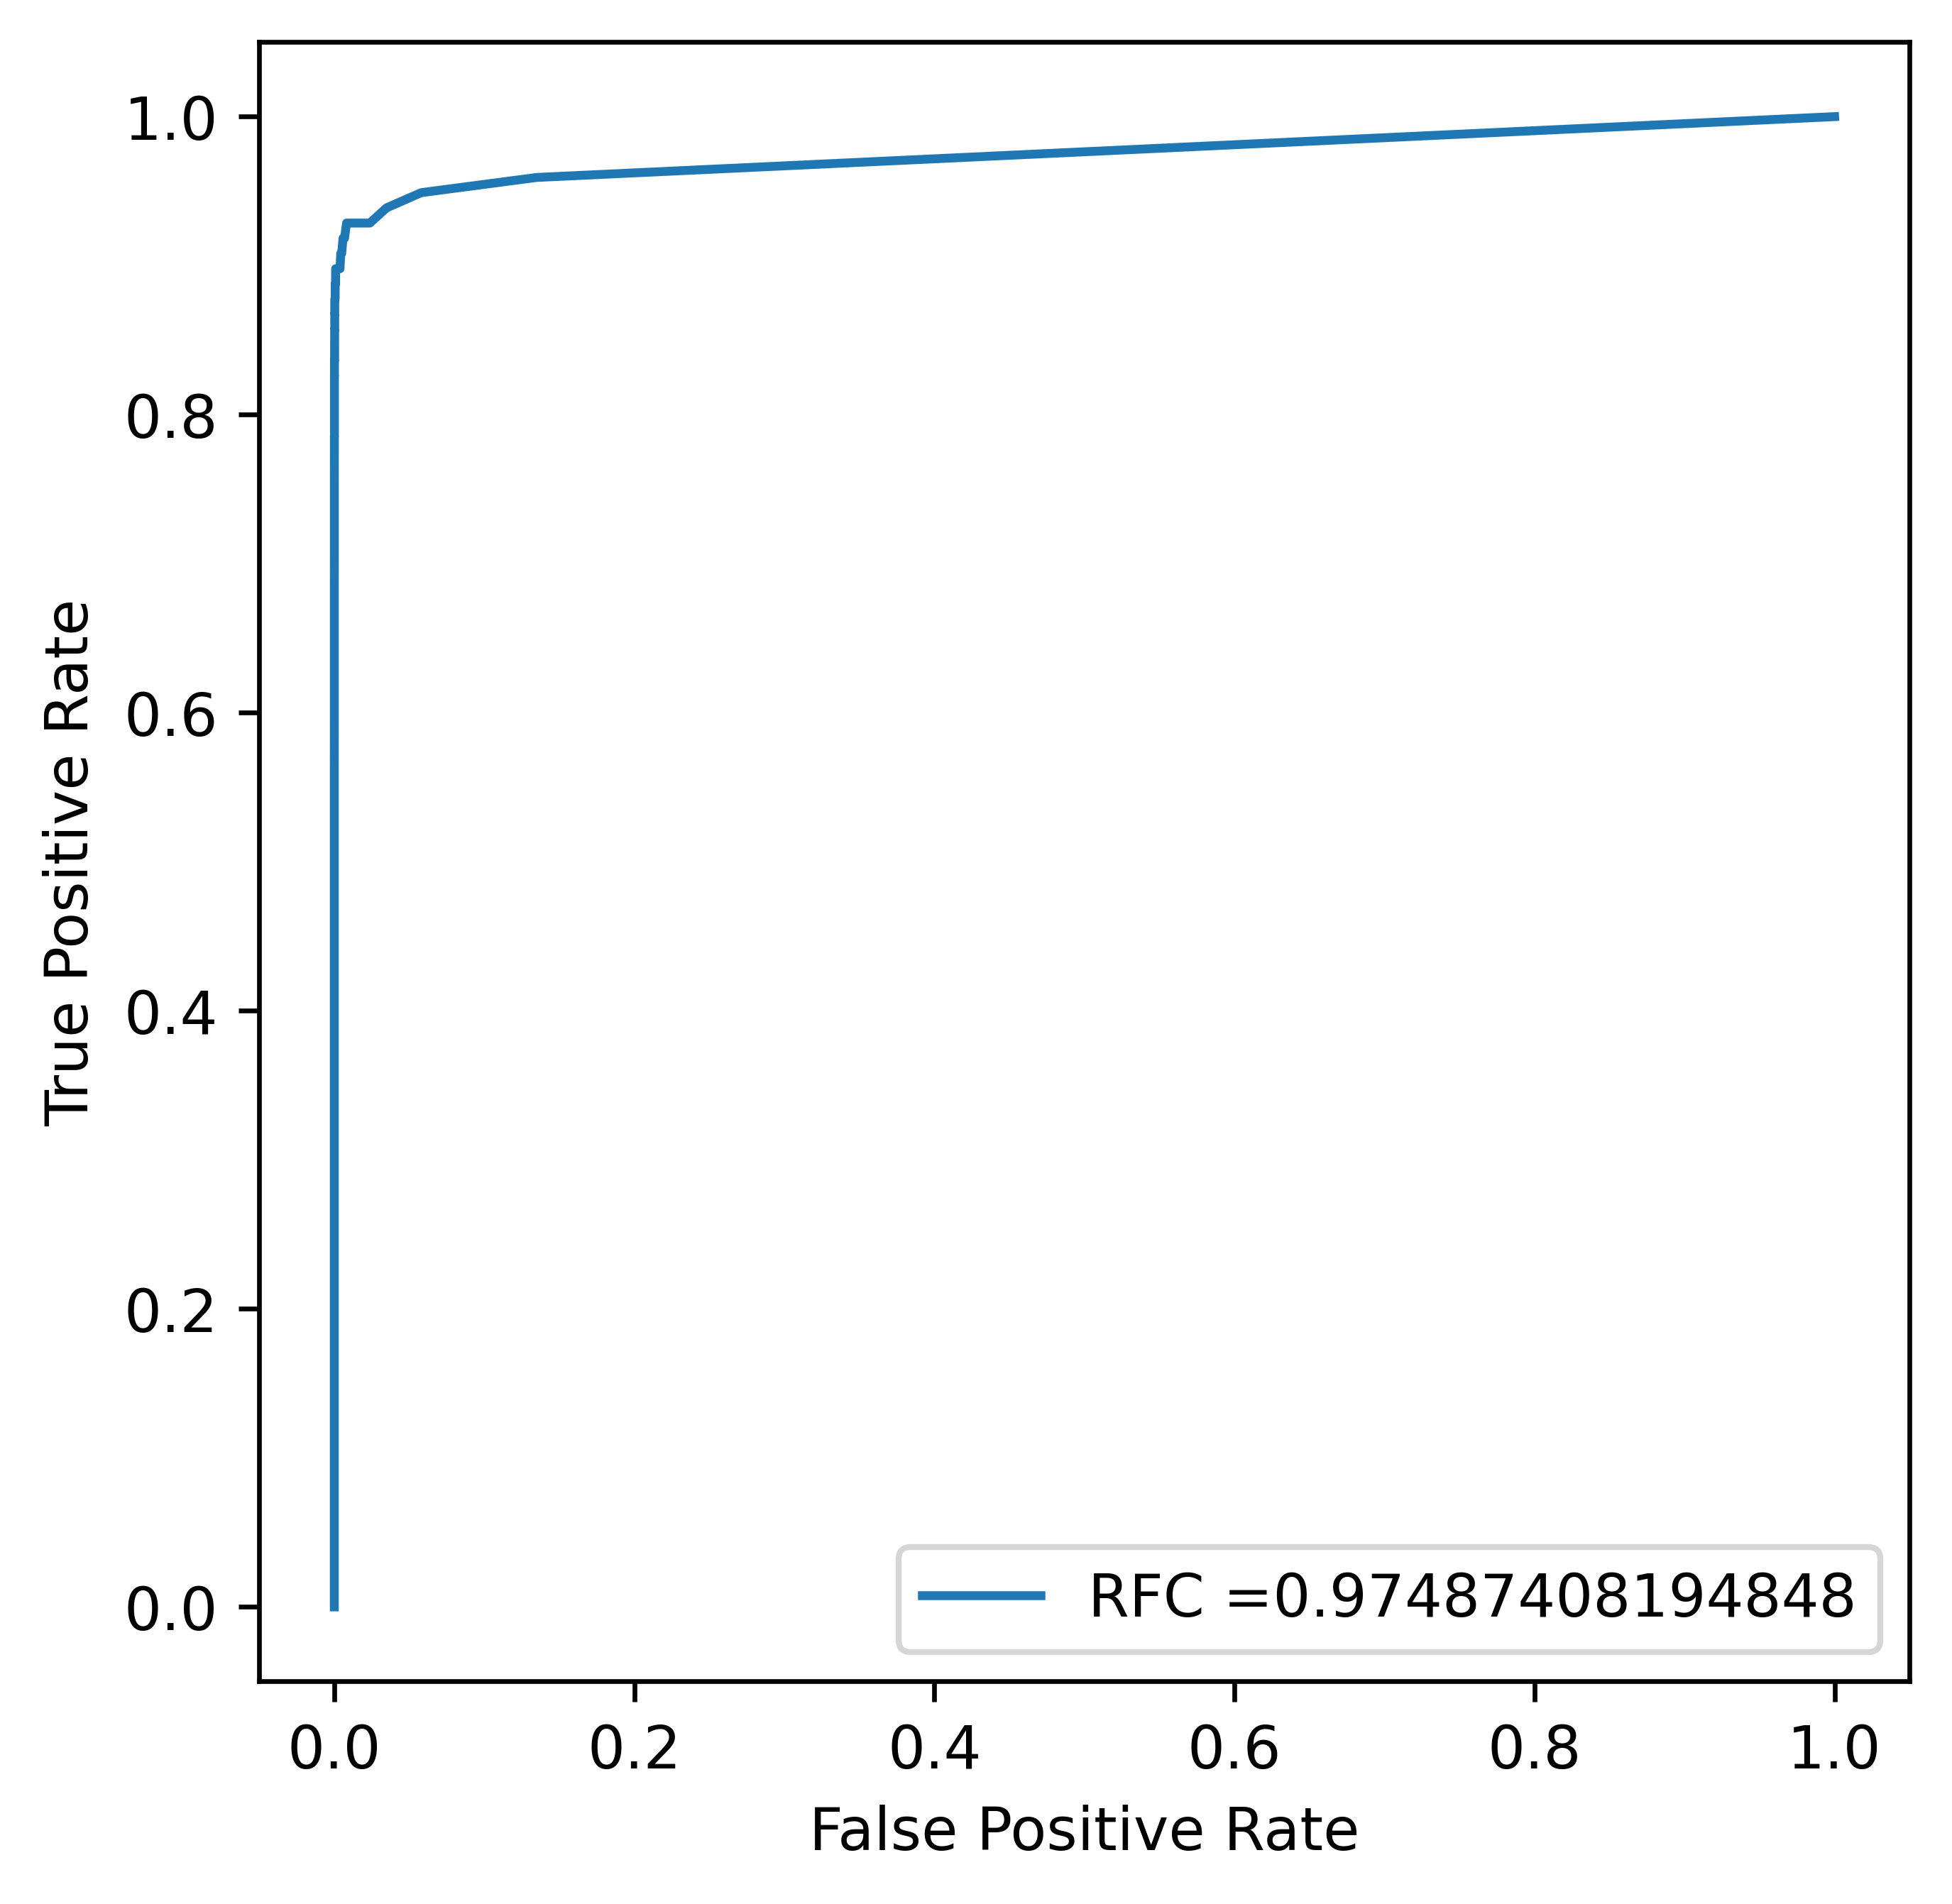

In [18]:
    y_pred_proba_dt = rf.predict_proba(X_test)[:, 1]
    fpr_dt, tpr_dt, thresholds = roc_curve(Y_test,  y_pred_proba_dt)
    auc_dt = roc_auc_score(Y_test, y_pred_proba_dt)
    
    plt.figure(figsize=(5, 5), dpi=600)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    plt.plot(fpr_dt,tpr_dt,linestyle='solid',label="RFC ="+str(auc_dt))
    plt.legend(loc=4)
    plt.show()

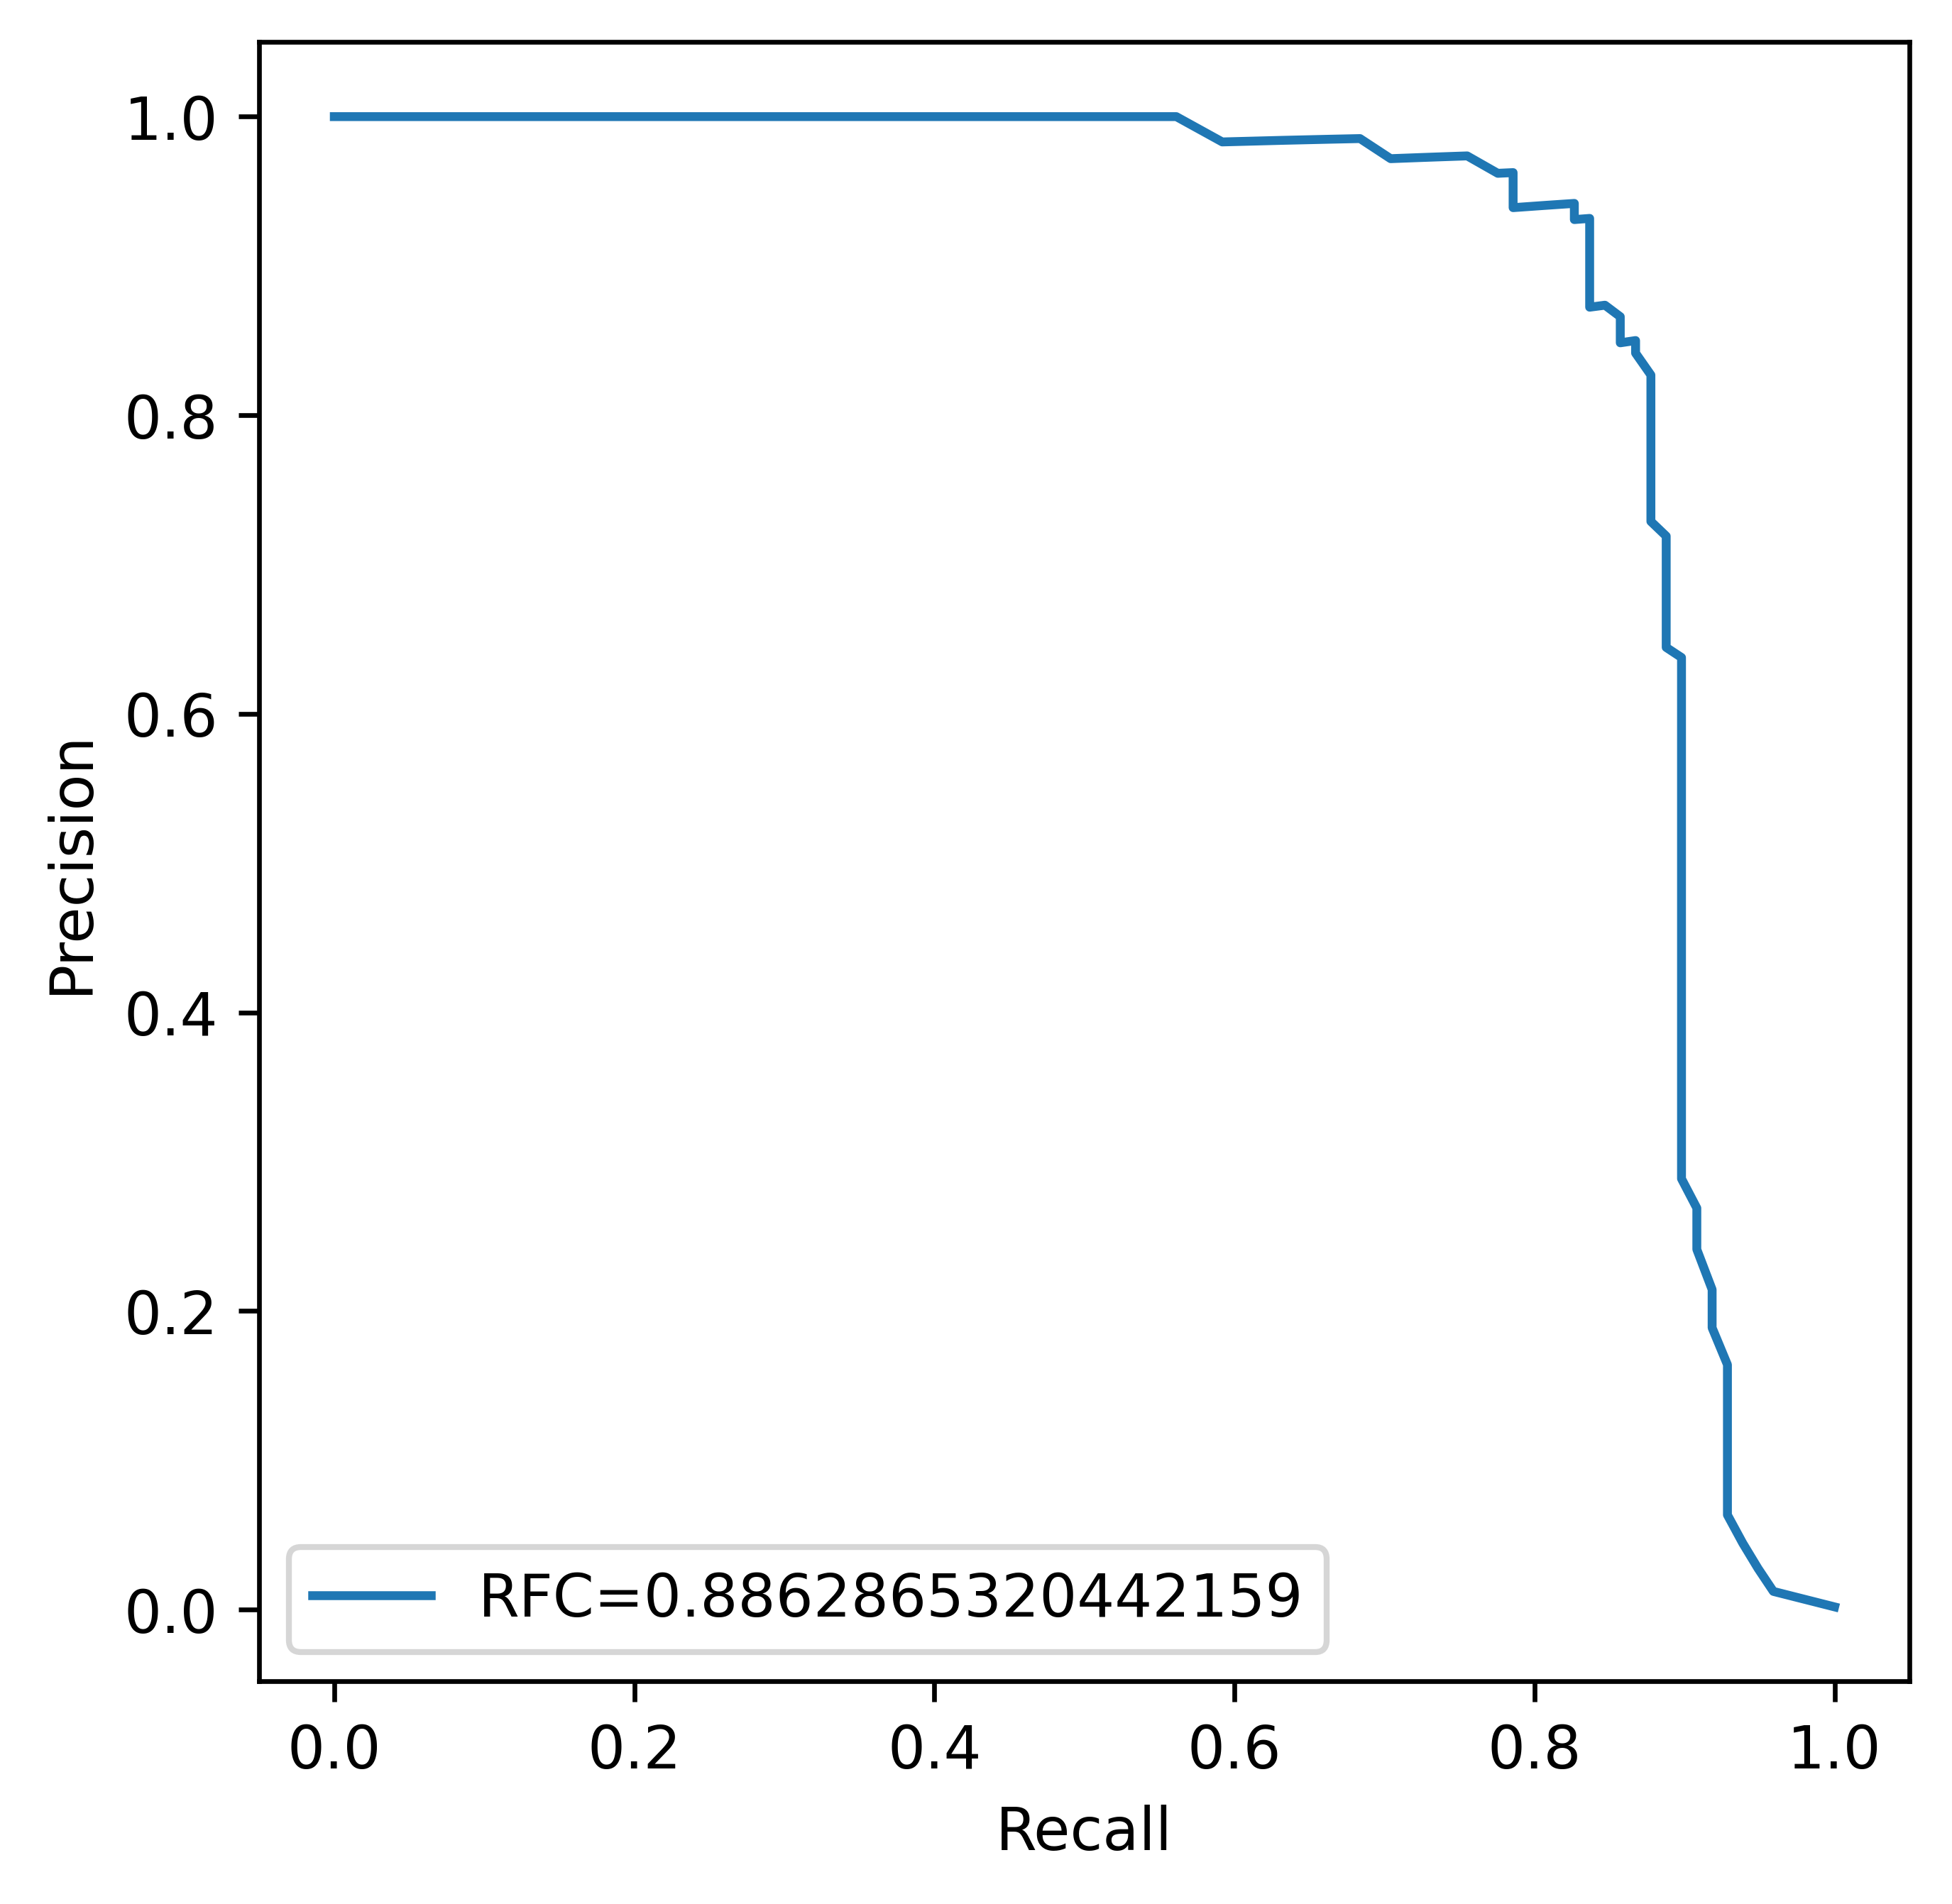

In [19]:
from sklearn.metrics import precision_recall_curve
from sklearn import metrics
#print('Logistic PR-AUC: %.3f'% auc_score)
y_test_prob_rf=rf.predict_proba(X_test)[:,1]
precision_rf, recall_rf,_ =precision_recall_curve(Y_test, y_test_prob_rf)
auc_score_rf=metrics.auc(recall_rf, precision_rf)

plt.figure(figsize=(5, 5), dpi=600)
plt.plot(recall_rf, precision_rf, marker='',label="RFC="+str(auc_score_rf))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

# ANN

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Elapsed time :  7.159661616999983
Accuracy on Training data : ,  0.9787426742463212
Elapsed time :  0.9032797899999423
Accuracy score on Test data ANN : 0.9878691057196025
Accuracy =  0.9878691057196025
Precision =  0.11642949547218628
Recall =  0.9183673469387755
F1 Score =  0.20665901262916186
[[56181     8]
 [  683    90]]


<Axes: >

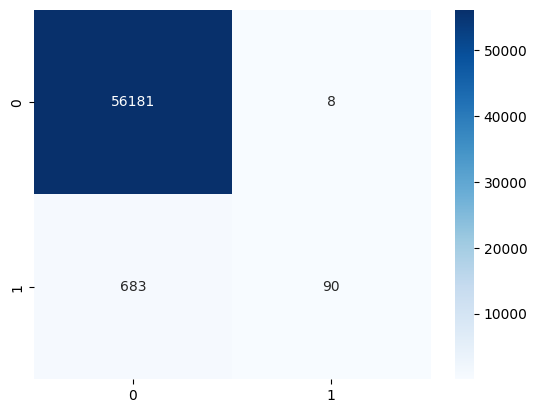

In [12]:
from sklearn.neural_network import MLPClassifier

MLPC = MLPClassifier(hidden_layer_sizes=(200,), max_iter=10000)

MLPC.fit(X_train,Y_train)

#Accuracy on training data

start_time = timeit.default_timer()

x_train_prediction = MLPC.predict(X_train)

end_time = timeit.default_timer()
elapsed_time = end_time - start_time

print("Elapsed time : ",elapsed_time)

training_data_accuracy = accuracy_score(x_train_prediction , Y_train)
print('Accuracy on Training data : , ', training_data_accuracy)

# accuracy on test data 

start_time = timeit.default_timer()

x_test_prediction = MLPC.predict(X_test)

end_time = timeit.default_timer()
elapsed_time = end_time - start_time

print("Elapsed time : ",elapsed_time)
test_data_accuracy=accuracy_score(x_test_prediction,Y_test)
print('Accuracy score on Test data ANN :' ,test_data_accuracy)

generate_model_report(Y_test, x_test_prediction)
#print(confusion_matrix(x_test_prediction,Y_test))
confusion_matrix(x_test_prediction,Y_test)
cf_matrix=confusion_matrix(x_test_prediction,Y_test)
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt='g')

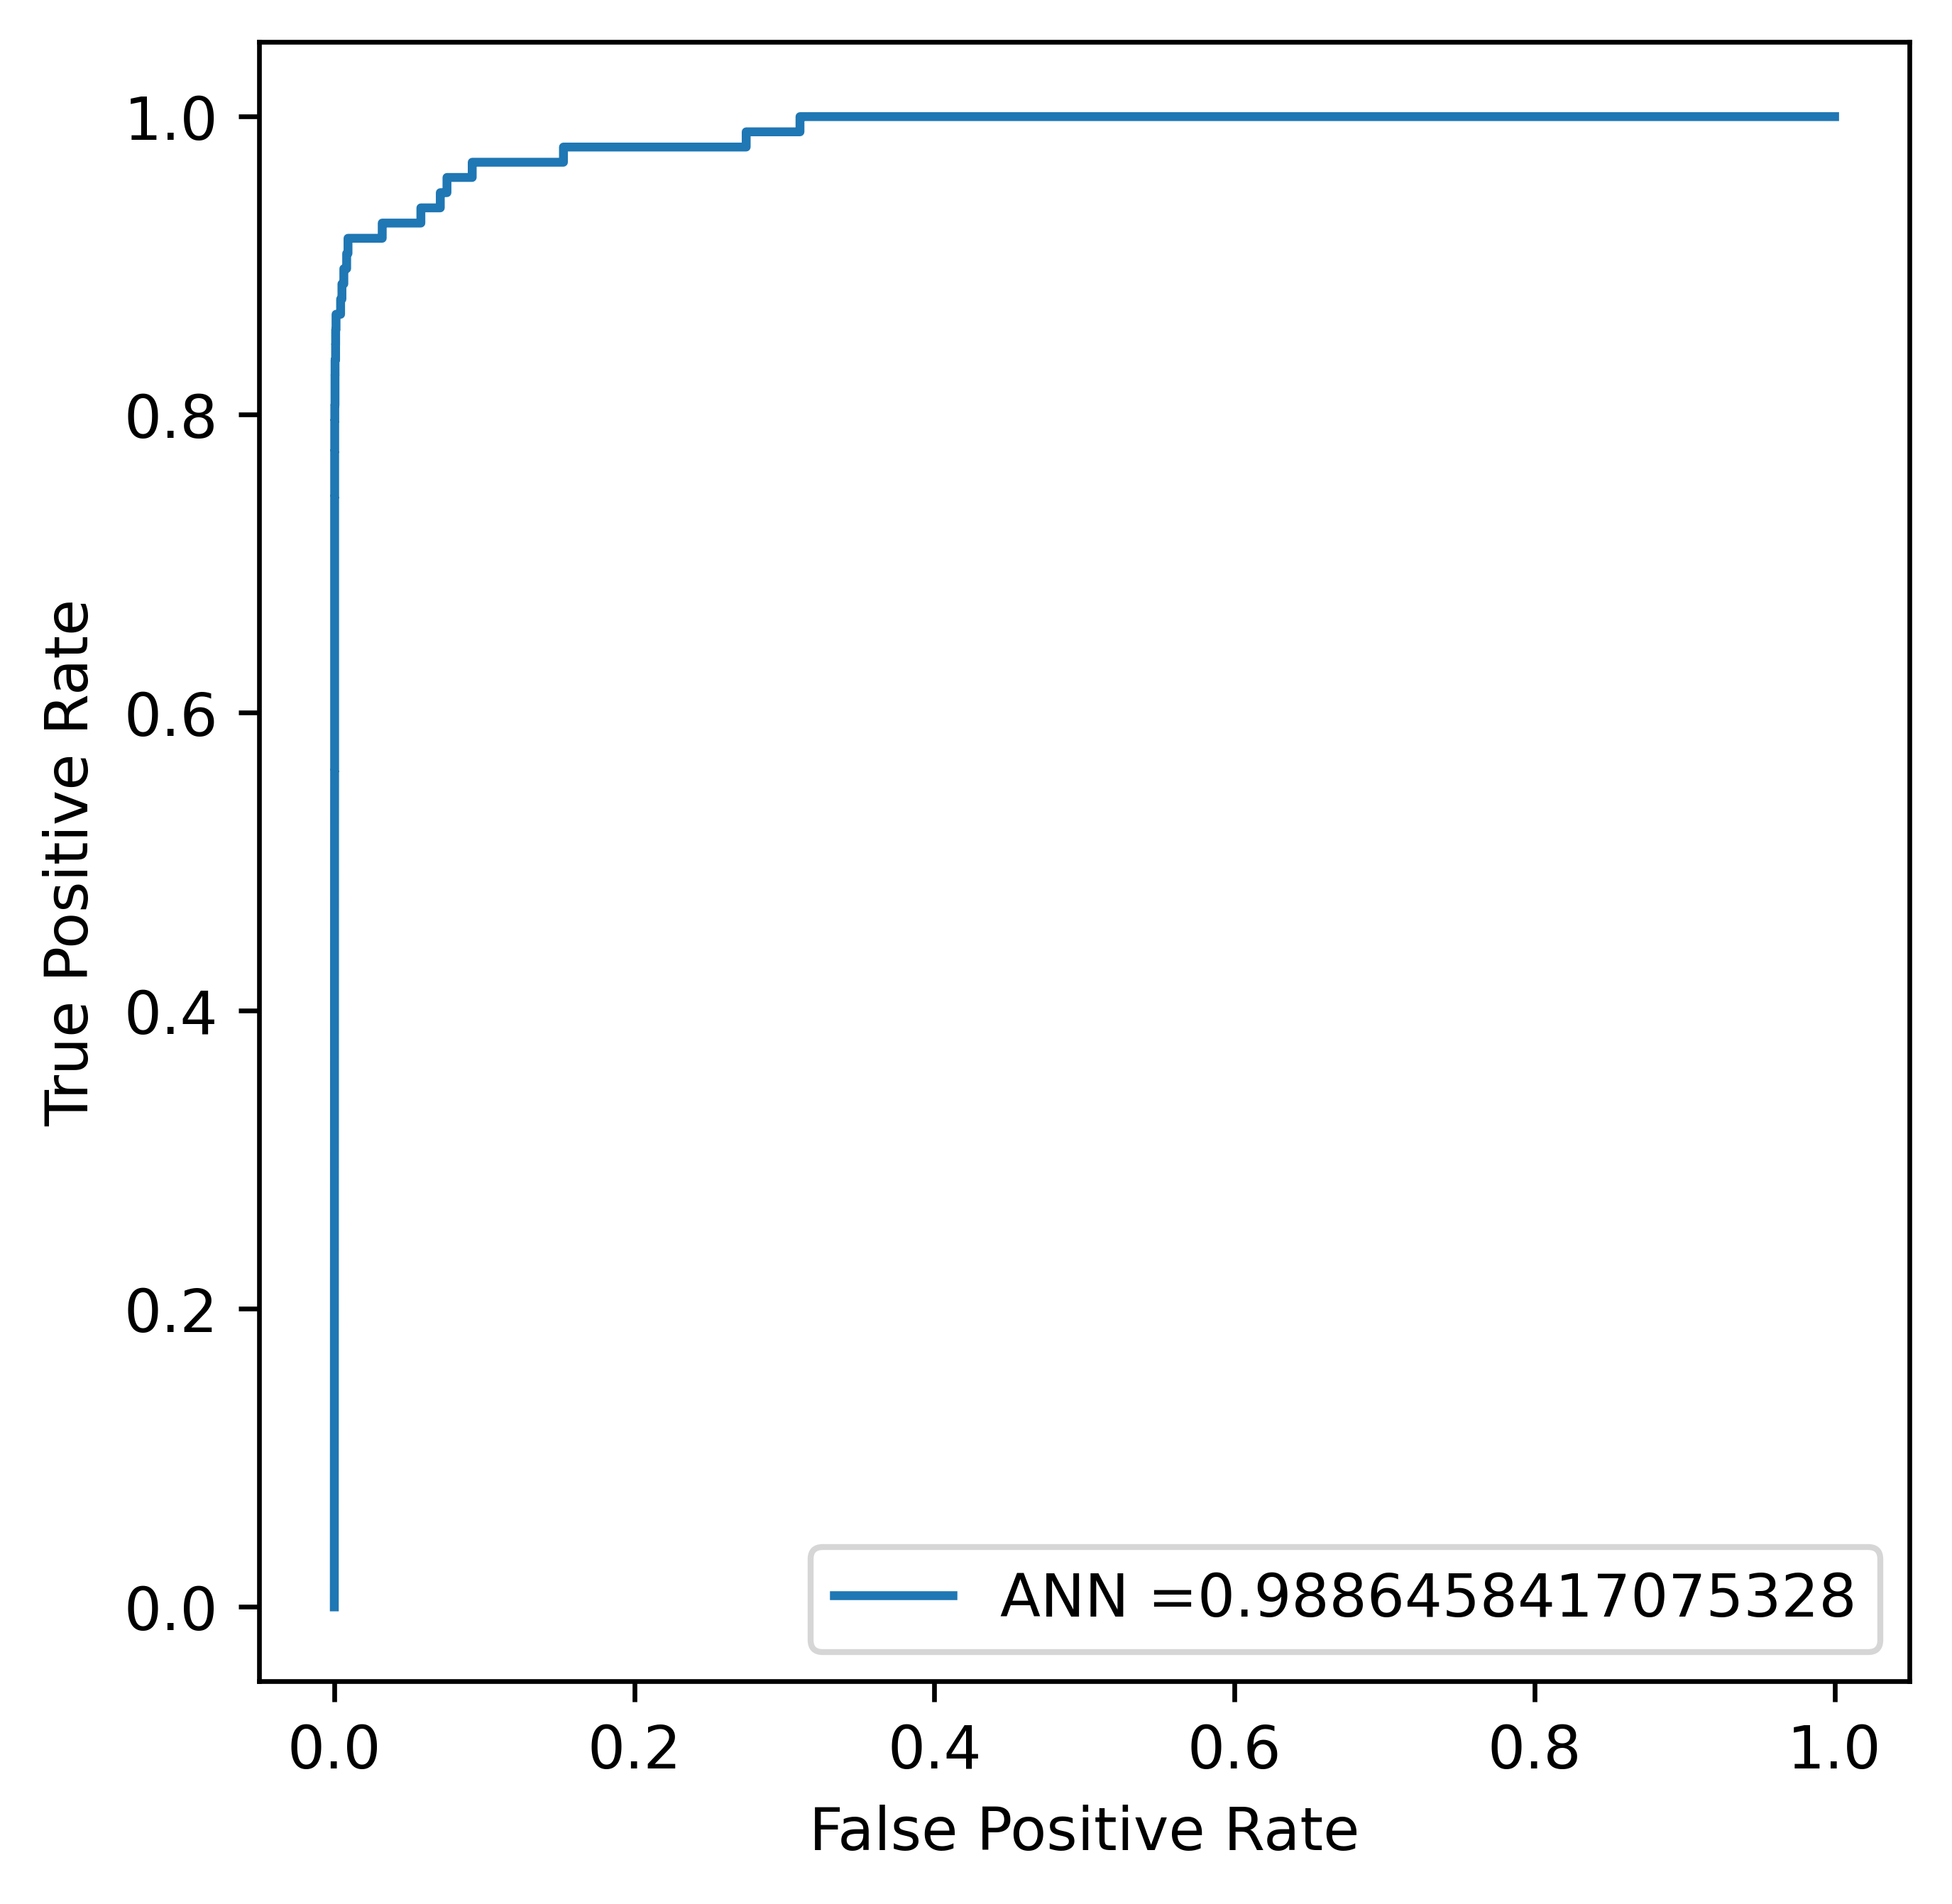

In [13]:
    y_pred_proba_dt = MLPC.predict_proba(X_test)[:, 1]
    fpr_dt, tpr_dt, thresholds = roc_curve(Y_test,  y_pred_proba_dt)
    auc_dt = roc_auc_score(Y_test, y_pred_proba_dt)
    
    plt.figure(figsize=(5, 5), dpi=600)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    plt.plot(fpr_dt,tpr_dt,linestyle='solid',label="ANN ="+str(auc_dt))
    plt.legend(loc=4)
    plt.show()

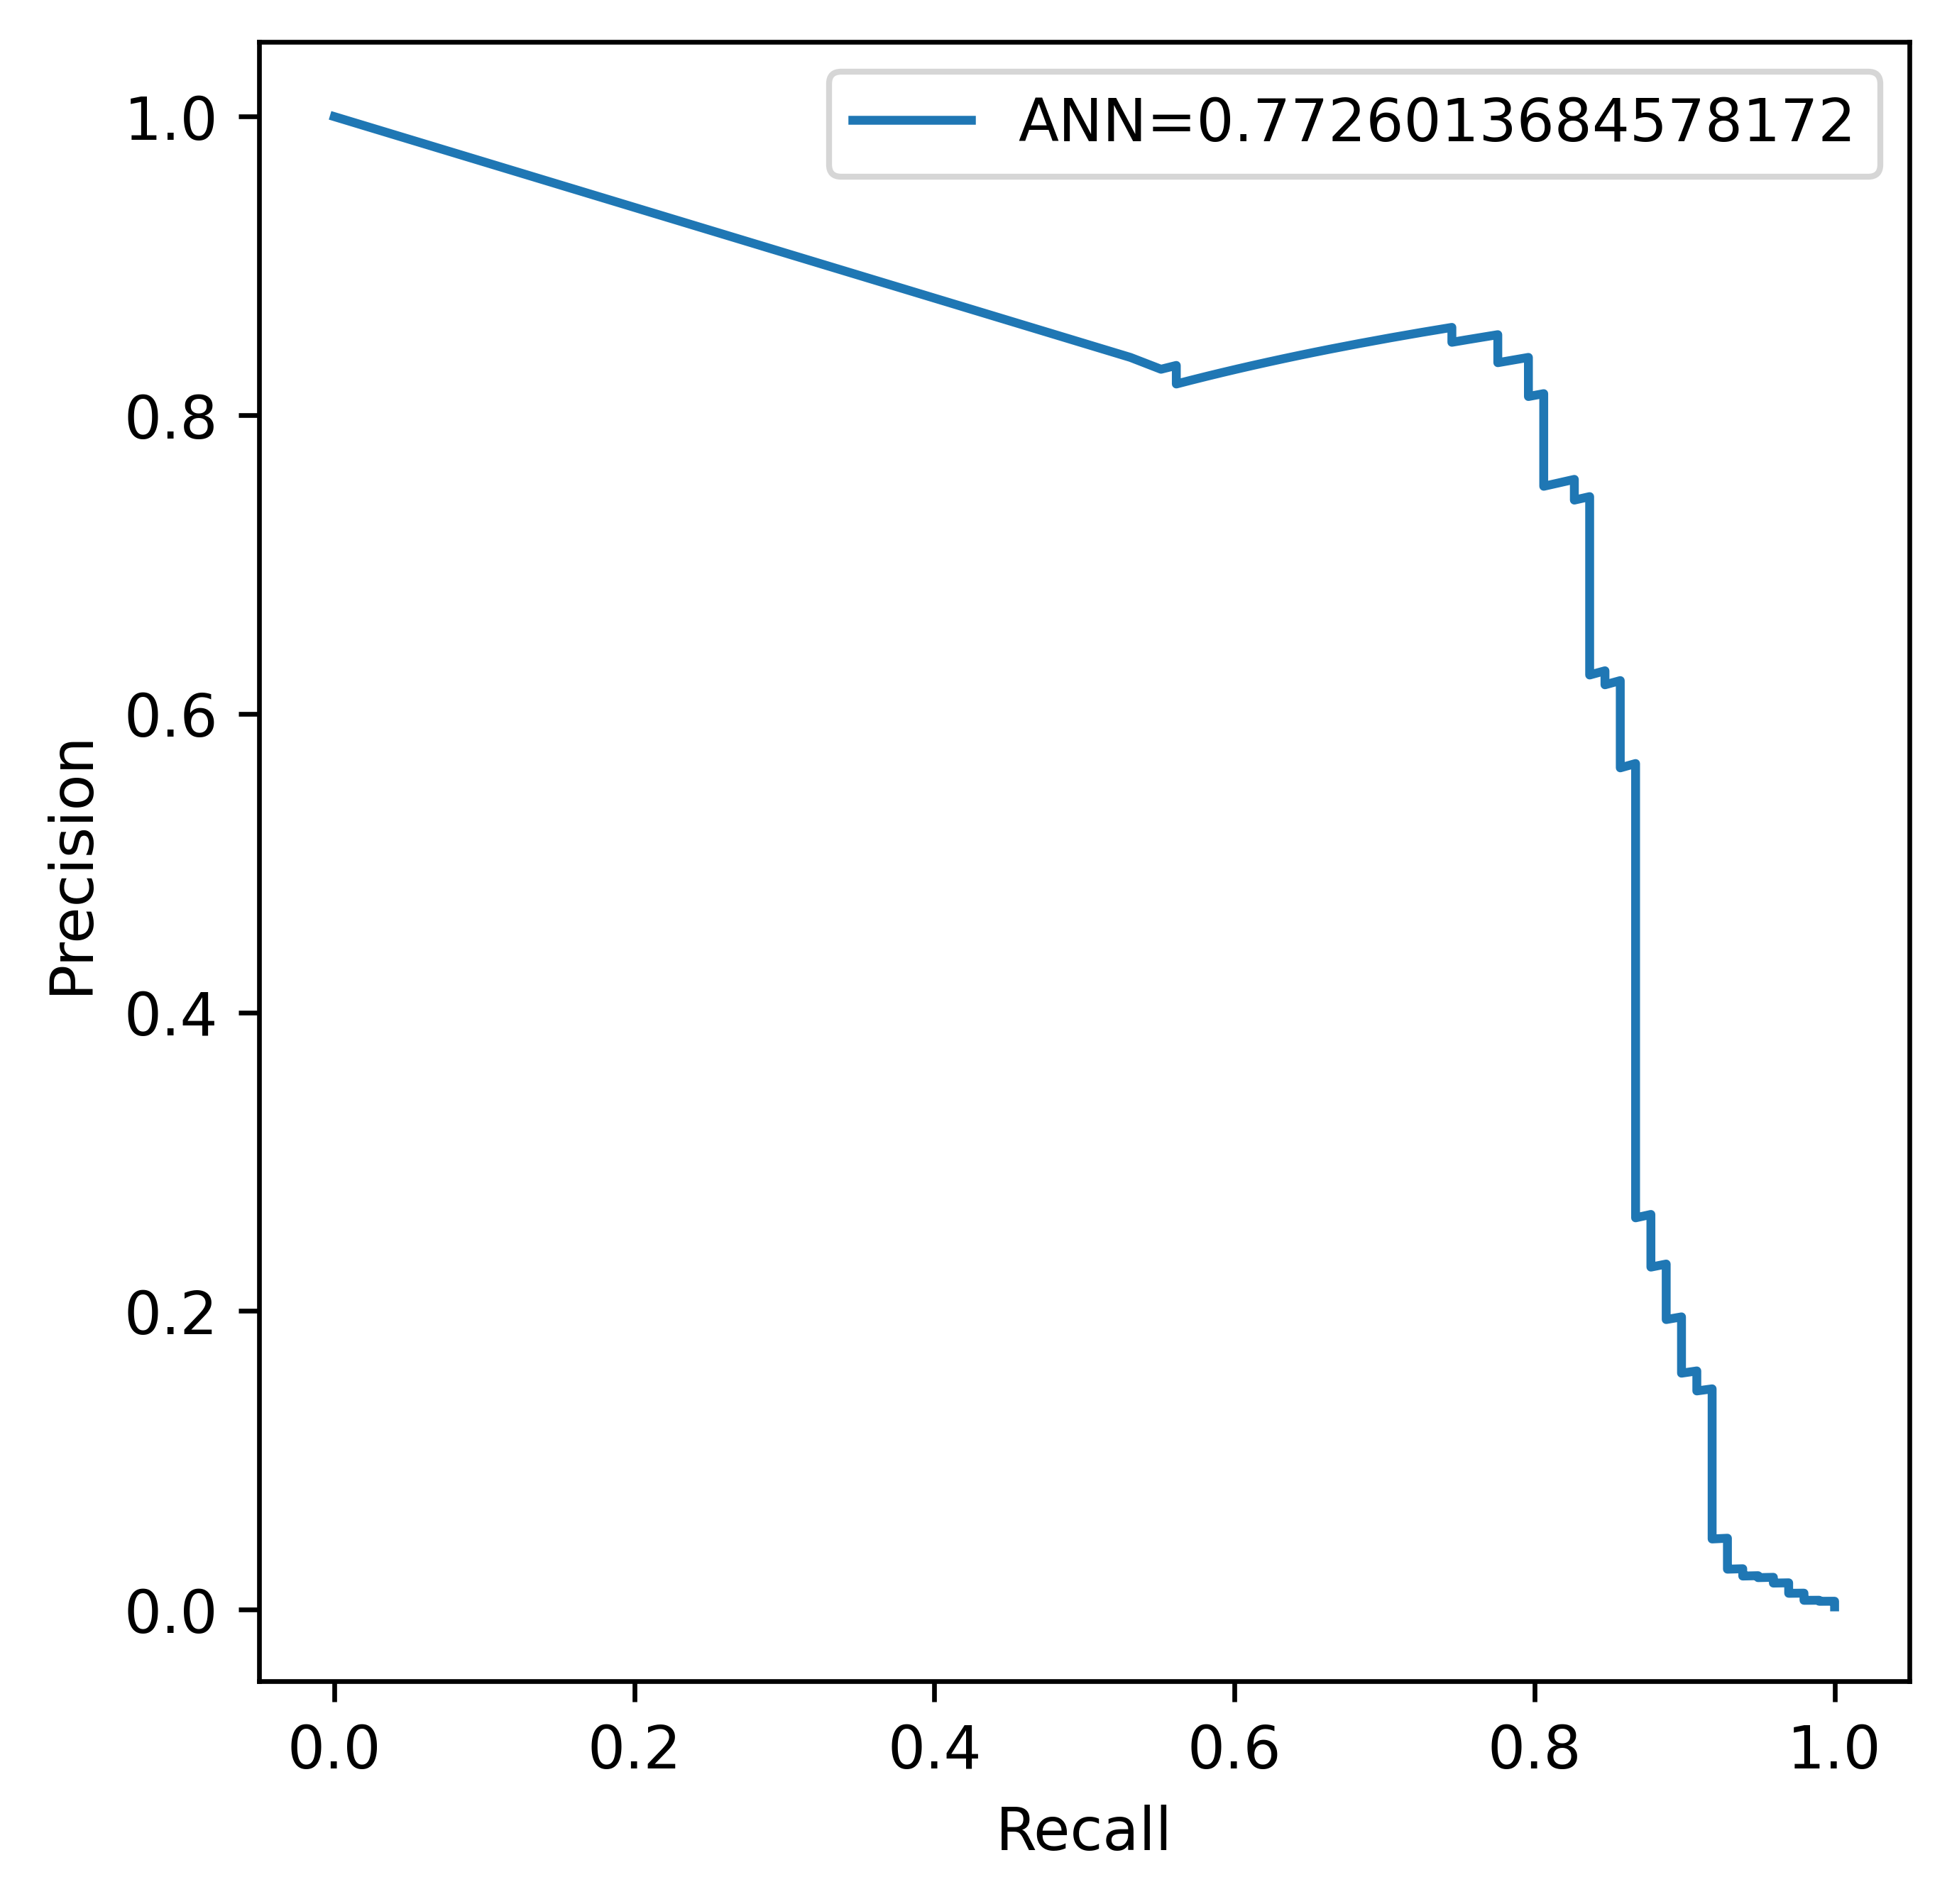

In [14]:
from sklearn.metrics import precision_recall_curve
from sklearn import metrics
#print('Logistic PR-AUC: %.3f'% auc_score)
y_test_prob_rf=MLPC.predict_proba(X_test)[:,1]
precision_rf, recall_rf,_ =precision_recall_curve(Y_test, y_test_prob_rf)
auc_score_rf=metrics.auc(recall_rf, precision_rf)

plt.figure(figsize=(5, 5), dpi=600)
plt.plot(recall_rf, precision_rf, marker='',label="ANN="+str(auc_score_rf))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors= 9,metric='manhattan',weights='uniform')

knn.fit(X_train,Y_train)

#Accuracy on training data
start_time =timeit.default_timer()

x_train_prediction = knn.predict(X_train)

end_time = timeit.default_timer()
elapsed_time = end_time - start_time

print("Elapsed time : ",elapsed_time)

training_data_accuracy = accuracy_score(x_train_prediction , Y_train)
print('Accuracy on Training data : , ', training_data_accuracy)
# accuracy on test data 

start_time =timeit.default_timer()
x_test_prediction  = knn.predict(X_test)

end_time = timeit.default_timer()
elapsed_time = end_time - start_time

print("Elapsed time : ",elapsed_time)

test_data_accuracy = accuracy_score(x_test_prediction,Y_test)
print('Accuracy score on Test data KNN :' ,test_data_accuracy)
Y_Test_Pred = knn.predict(X_test)
generate_model_report(Y_test, Y_Test_Pred)
confusion_matrix(x_test_prediction,Y_test)
cf_matrix=confusion_matrix(x_test_prediction,Y_test)
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt='g')

/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
    y_pred_proba_dt = knn.predict_proba(X_test)[:, 1]
    fpr_dt, tpr_dt, thresholds = roc_curve(Y_test,  y_pred_proba_dt)
    auc_dt = roc_auc_score(Y_test, y_pred_proba_dt)
    
    plt.figure(figsize=(5, 5), dpi=600)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    plt.plot(fpr_dt,tpr_dt,linestyle='solid',label="KNN ="+str(auc_dt))
    plt.legend(loc=4)
    plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn import metrics
#print('Logistic PR-AUC: %.3f'% auc_score)
y_test_prob_rf=knn.predict_proba(X_test)[:,1]
precision_rf, recall_rf,_ =precision_recall_curve(Y_test, y_test_prob_rf)
auc_score_rf=metrics.auc(recall_rf, precision_rf)

plt.figure(figsize=(5, 5), dpi=600)
plt.plot(recall_rf, precision_rf, marker='',label="KNN="+str(auc_score_rf))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

In [ ]:
# Train Random Forest classifier, Extra-Trees classifier, SVM and MLP

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import BernoulliNB
from sklearn import tree
classify_ = tree.DecisionTreeClassifier(criterion= 'entropy', max_depth= 10, min_samples_leaf= 6, min_samples_split= 3)
model = XGBClassifier(colsample_bytree= 1 , gamma = 0 , max_depth= 12, min_child_weight= 1, n_estimators=1750, reg_alpha= 0, reg_lambda= 0, seed= 0)
random_forest_clf = RandomForestClassifier(n_jobs=4, 
                             random_state=2018,
                             criterion='gini',
                             n_estimators=100,
                             verbose=False)
extra_trees_clf = ExtraTreesClassifier(n_estimators=10, random_state=42)
svm_clf =SVC()
mlp_clf = MLPClassifier(hidden_layer_sizes=(200,), max_iter=10000)
lr_clf=LogisticRegression(random_state=42)
knn_clf=KNeighborsClassifier(n_neighbors= 9,metric='manhattan',weights='uniform')
kb_clf=BernoulliNB(binarize=0.0)
estimators = [random_forest_clf,knn_clf,classify_,mlp_clf,model]
for estimator in estimators:
    start_time = perf_counter()
    estimator.fit(X_train, y_train)
    end_time = perf_counter()
    elapsed_time = end_time - start_time

    print("Elapsed time : ",elapsed_time)
    

In [ ]:
# .score() method directly calls sklearn.metrics.accuracy_score method.

[estimator.score(X_test, y_test) for estimator in estimators]

In [ ]:
# Combine the classifiers into an ensemble that outperforms them all on the validation set, using a soft or hard voting classifier.

from sklearn.ensemble import VotingClassifier

named_estimators = [ ("random_forest_clf", random_forest_clf),("knn ",knn_clf), ("decision tree", classify_),("ann",mlp_clf),("xgbc",model)] #,("lr_clf",lr_clf),("knn_clf",knn_clf),("kb_clf",kb_clf)

In [ ]:
voting_clf = VotingClassifier(named_estimators,voting ='hard')

In [ ]:
start_time =timeit.default_timer()
voting_clf.fit(X_train, y_train)
end_time = timeit.default_timer()
elapsed_time = end_time - start_time
print('elapsed time',elapsed_time)

In [ ]:
start_time =timeit.default_timer()
x_train_prediction = voting_clf.predict(X_train)
end_time = timeit.default_timer()
elapsed_time = end_time - start_time
print('elapsed time',elapsed_time)

start_time =timeit.default_timer()
x_test_prediction=voting_clf.predict(X_test)
end_time = timeit.default_timer()
elapsed_time = end_time - start_time
print('elapsed time',elapsed_time)
training_data_accuracy = accuracy_score(x_test_prediction , y_test)
test_data_accuracy=accuracy_score(x_test_prediction,y_test)
print('Accuracy score on Test data :' ,test_data_accuracy)

In [ ]:
X_test.shape

In [ ]:
print(generate_model_report(y_test, x_test_prediction))
print(confusion_matrix(y_test, x_test_prediction))

# ROC AUC Curve

In [ ]:
from sklearn.metrics import roc_curve, auc

y_pred = voting_clf.predict(X_test)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Compute ROC AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label="ROC curve="  +str(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve on Ensemble:Voting')
plt.legend(loc="lower right")
plt.show()

# PR Curve

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn import metrics

y_pred = voting_clf.predict(X_test)

# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
auc_score_rf=metrics.auc(recall, precision)



plt.figure(figsize=(5,5))
plt.plot(recall, precision, marker='',label="PR Curve="+str(auc_score_rf))

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Recall-Precision Curve on Ensemble voting:Hard")
plt.legend()
plt.show()